In [251]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 브라질 Olist Store의 공개 데이터 셋을 활용한 RFM 분석
- 2016년부터 2018년 주문 데이터 약 10만건

### 데이터 셋 구조 및 스키마 이해

In [252]:
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist/olist_geolocation_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [253]:
# 고객 정보
# customer_id : 각 주문에 할당되는 고유 ID (주문별로 다름)
# customer_unique_id : 고객의 고유한 실제 ID (가명화, 재구매자 식별 가능)
# customer_zip_code_prefix : 고객 우편 번호 5자리
# customer_city : 고객 도시
# customer_state : 고객 주
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [254]:
# 우편 번호에 대한 위도와 경도 정보
# geolocation_zip_code_prefix : 우편번호 앞 5자리
# geolocation_lat : 위도
# geolocation_lng : 경도
# geolocation_city : 도시
# geolocation_state : 주
olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [255]:
# 주문 상품 정보(한 주문에 여라 상품 가능)
# order_id : 주문 고유 식별자
# order_item_id : 주문 내 상품 순서
# product_id : 상품 고유 식별자
# seller_id : 판매자 고유 식별자
# shipping_limit_date : 판매자의 발송 기한
# price : 상품 가격
# freight_value : 배송비
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [256]:
# 결제 정보
# order_id : 주문 고유 식별자
# payment_sequential : 결제 방식 순서(한 주문을 여러 방식으로 결제 시)
# payment_type : 결제 방식
# payment_installments : 할부 개월 수
# payment_value : 결제 금액
olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [257]:
# 고객 리뷰
# review_id : 리뷰 고유 식별자
# order_id : 주문 고유 식별자
# review_score : 리뷰 점수 (1-5점)
# review_comment_title : 리뷰 제목 (포르투갈어)
# review_comment_message : 리뷰 내용 (포르투갈어)
# review_creation_date : 리뷰 작성 날짜
# review_answer_timestamp : 리뷰 답변 시간
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [258]:
# 주문 핵심 데이터
# order_id : 주문 고유 식별자
# customer_id : 주문한 고객 ID (Customers 테이블과 연결)
# order_status : 주문 상태 (delivered, shipped, canceled 등)
# order_purchase_timestamp : 주문 접수 시각
# order_approved_at : 결제 승인 시각
# order_delivered_carrier_date : 주문이 배송사에게 전달된 시각
# order_delivered_customer_date : 실제 고객 배송 시각
# order_estimated_delivery_date : 구매시 제공된 예상 배송 날짜
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [259]:
# 상품 정보
# product_id : 상품 고유 식별자
# product_category_name : 상품 카테고리명(포르투갈어)
# product_name_lenght : 상품 이름 길이
# product_description_lenght : 상품 설명 길이
# product_photos_qty : 상품 사진 개수
# product_weight_g : 상품 무게 (g)
# product_length_cm : 상품 길이 (cm)
# product_height_cm : 상품 높이 (cm)
# product_width_cm : 상품 폭 (cm)
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [260]:
# 판매자 정보
# seller_id : 판매자 고유 식별자
# seller_zip_code_prefix : 판매자 우편번호 앞 5자리
# seller_city : 판매자 도시
# seller_state : 판매자 주(state)
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [261]:
# 상품 카테고리 명을 영어로 번역했을 때의 정보
# product_category_name : 상품 카테고리 명 (포르투갈어)
# product_category_name_english : 번역된 상품 카테고리 명 (영어)
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


![](https://i.imgur.com/HRhd2Y0.png)

In [262]:
# 작업의 편리성을 위해 모든 데이터 프레임들을 리스트에 담아 준다.
df_list = [olist_customers, olist_geolocation, olist_order_items, olist_order_payments, olist_order_reviews, olist_orders, olist_products, olist_sellers, product_category_name_translation]
df_name_list = ["olist_customers", "olist_geolocation", "olist_order_items", "olist_order_payments", "olist_order_reviews", "olist_orders", "olist_products", "olist_sellers", "product_category_name_translation"]

In [263]:
# 각 데이터 프레임별 결측치 확인
for idx in range(len(df_list)) :
    print(df_name_list[idx])
    display(df_list[idx].isna().sum())
    print("-" * 30)

olist_customers


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

------------------------------
olist_geolocation


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

------------------------------
olist_order_items


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

------------------------------
olist_order_payments


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

------------------------------
olist_order_reviews


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

------------------------------
olist_orders


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

------------------------------
olist_products


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

------------------------------
olist_sellers


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

------------------------------
product_category_name_translation


product_category_name            0
product_category_name_english    0
dtype: int64

------------------------------


In [264]:
# 각 컬럼별 타입
df_list[0].columns
df_list[0]['customer_id'].dtype

for idx in range(len(df_list)) : 

    print(df_name_list[idx])
    for name1 in df_list[idx].columns : 
        print(f'{name1} : {df_list[idx][name1].dtype}')
              
    print('-' * 30)

olist_customers
customer_id : object
customer_unique_id : object
customer_zip_code_prefix : int64
customer_city : object
customer_state : object
------------------------------
olist_geolocation
geolocation_zip_code_prefix : int64
geolocation_lat : float64
geolocation_lng : float64
geolocation_city : object
geolocation_state : object
------------------------------
olist_order_items
order_id : object
order_item_id : int64
product_id : object
seller_id : object
shipping_limit_date : object
price : float64
freight_value : float64
------------------------------
olist_order_payments
order_id : object
payment_sequential : int64
payment_type : object
payment_installments : int64
payment_value : float64
------------------------------
olist_order_reviews
review_id : object
order_id : object
review_score : int64
review_comment_title : object
review_comment_message : object
review_creation_date : object
review_answer_timestamp : object
------------------------------
olist_orders
order_id : object


### 주요 분석 주제

1. 매출 및 주문 분석
- 시계열 매출 추이 : 일별/월별 주문량 및 매출액 추이 분석
- 요일/시간대 별 패턴 : 주문이 가장 많이 발생하는 요일 및 시간대 파악
- 객단가 분석 : 1회 주문시 평균 결제 금액 분석

2. 고객 행동 분석 (Customer Behavior)
- 고객 세분화 (RFM 분석) : Recency(최근 언제 구매했는가?), Frequency (얼마자 자주 구매 했는가?), Monetary (얼마나 많이 지출했는가?)
- 재구매율 분석 : 한 번 구매한 고객이 다시 구매하는 비율 파악
- 지역별 고객 분포 : 지역별 고객 밀도 분석

3. 상품 및 카테고리 분석
- 베스트 셀러 분석 : 가장 많이 팔린 상품 및 매출 상위 카테고리
- 연관 구매 분석 (장바구니 분석) : 함께 자주 구매되는 상품 조합 찾기

4. 물류 및 배송 성능
- 배송 지연 분석 : 에상 배송일 대비 실제 배송일 비교
- 배송비 효율성 : 상품 무게/ 부피 및 지역에 따른 배송비 차이 분석

5. 고객 만족도
- 평점 분석 : 카테고리별/판매자별 평균 평점 비교
- 리뷰 텍스트 분석 : 부정적 리뷰에 자주 등장하는 키워드 확인

6. 문제~~~~

### 시계열 매출 추이 : 일별/월별 주문량 및 매출액 추이 분석

1. 분석 개요
- 이커머스 비즈니스에서 가장 기초적이면서 중요한 지표인 "주문량 (Orders)" 과 "총 거래액(GMV, Gross Merchandise Value)"의 흐름 파악
- 목표 : 일별/월별 매출 트랜드를 시작화하여 성장세, 계절성, 특정 이벤트(프로모션 등)의 영향을 분석한다.

2. 데이터 전처리 전략
- 날짜 변환 : 문자열로 되어 있는 날짜를 날짜데이터로 변환
- 데이터 병향 : 주문 시간 정보와 상품 정보가 분리되어 있기 때문에 병합한다.
- 유효 데이터 필터링 : 취소된 주문이나 이용 불가 주문은 매출 집계에서 제외한다.

In [265]:
# 주문 핵심 데이터
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [266]:
# 주문 상품 정보(한 주문에 여라 상품 가능)
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [267]:
# 데이터를 불러온다.
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')

In [268]:
# 날짜 형식 변환 (String -> Datetime)
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [269]:
# 유효 주문 필터링
display(olist_orders['order_status'].value_counts())

# canceld와 unavailable는 제외한다.
invalid_list = ['canceled', 'unavailable']
valid_orders = olist_orders.query('order_status not in @invalid_list')
valid_orders = valid_orders.reset_index(drop=True)
valid_orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64

In [270]:
# 데이터 프레임 병합
merged_data = pd.merge(valid_orders, olist_order_items, left_on='order_id', right_on='order_id', how='inner')
merged_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112096,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112097,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112098,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112099,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [271]:
# 데이터 확인
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112101 entries, 0 to 112100
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   customer_id                    112101 non-null  object        
 2   order_status                   112101 non-null  object        
 3   order_purchase_timestamp       112101 non-null  datetime64[ns]
 4   order_approved_at              112086 non-null  object        
 5   order_delivered_carrier_date   111380 non-null  object        
 6   order_delivered_customer_date  110189 non-null  object        
 7   order_estimated_delivery_date  112101 non-null  object        
 8   order_item_id                  112101 non-null  int64         
 9   product_id                     112101 non-null  object        
 10  seller_id                      112101 non-null  object        
 11  

In [272]:
# 날짜 데이터만 있는 date 컬럼을 생성한다.
# .dt.floor('D') : 시간과 날짜 데이터에서 시간을 버리고 날짜만 남긴다.
merged_data['date'] = merged_data['order_purchase_timestamp'].dt.floor('D')
merged_data['date']

0        2017-10-02
1        2018-07-24
2        2018-08-08
3        2017-11-18
4        2018-02-13
            ...    
112096   2018-02-06
112097   2017-08-27
112098   2018-01-08
112099   2018-01-08
112100   2018-03-08
Name: date, Length: 112101, dtype: datetime64[ns]

In [273]:
# 일별 집계
daily_trend = merged_data.groupby('date').agg({
    # 고유 주문 건수 (중복 제외)
    'order_id' : 'nunique',
    # 매출액 합계 (GMV)
    'price' : 'sum'
})
daily_trend.columns = ['daily_orders', 'daily_gmv']
daily_trend

,daily_orders,daily_gmv
date,,
2016-09-04,1,72.89
2016-09-15,1,134.97
2016-10-03,7,441.98
2016-10-04,58,9571.16
2016-10-05,39,6856.56
...,...,...
2018-08-26,73,8070.71
2018-08-27,66,5345.91
2018-08-28,39,3673.91


In [274]:
# 시간 데이터를 '년-월' 형태로 담아준다.
merged_data['month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
merged_data['month']

0         2017-10
1         2018-07
2         2018-08
3         2017-11
4         2018-02
           ...   
112096    2018-02
112097    2017-08
112098    2018-01
112099    2018-01
112100    2018-03
Name: month, Length: 112101, dtype: period[M]

In [275]:
monthly_trend = merged_data.groupby('month').agg({
    'order_id' : 'nunique',
    'price' : 'sum'
})

monthly_trend.columns = ['monthly_orders', 'monthly_gmv']
monthly_trend

,monthly_orders,monthly_gmv
month,,
2016-09,2,207.86
2016-10,290,44507.30
2016-12,1,10.90
2017-01,787,120098.27
2017-02,1718,244959.35
2017-03,2617,368341.32
2017-04,2377,353842.98
2017-05,3640,503159.19
2017-06,3205,429916.61


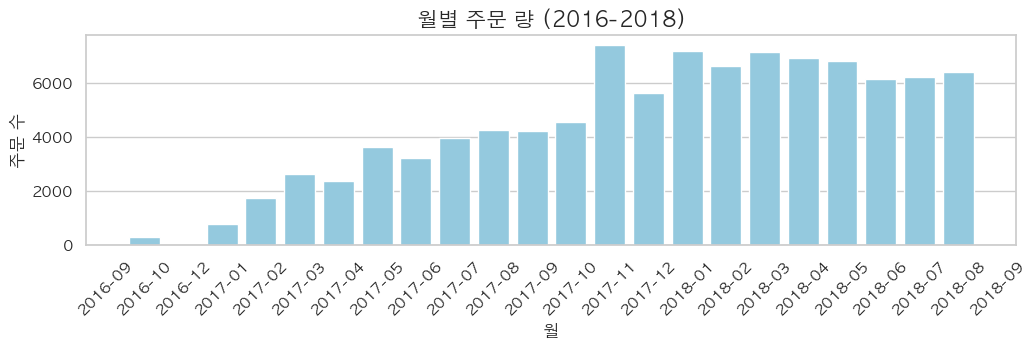

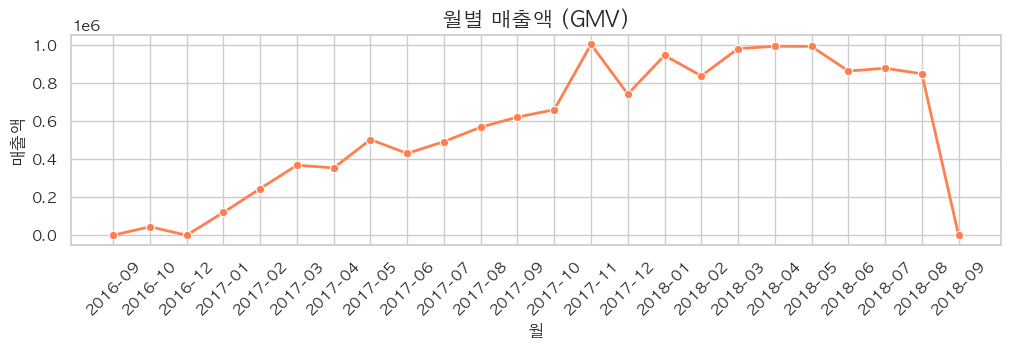

In [276]:
# 시각화
# 그래프 스타일 지정
sns.set(style='whitegrid')
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 월별 주문량 (Bar Plot)
plt.subplot(2, 1, 1)
sns.barplot(x=monthly_trend.index.strftime('%Y-%m'), y=monthly_trend['monthly_orders'], color='skyblue')
plt.title('월별 주문 량 (2016-2018)', fontsize=15)
plt.ylabel('주문 수')
plt.xlabel('월')
plt.xticks(rotation=45)
plt.show()

# 월별 매출액 (Line Plot)
plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_trend, x=monthly_trend.index.strftime('%Y-%m')
             , y='monthly_gmv', marker='o', color='coral', linewidth=2)
plt.title("월별 매출액 (GMV)", fontsize=15)
plt.ylabel('매출액')
plt.xlabel('월')
plt.xticks(rotation=45)
plt.show()

### 분석 결과 해석
- 전반적인 상승세 : 2017년 초부터 2018년 중반까지 주문량과 매출액이 지속적으로 우상향 하는 성장세를 보이고 있다.
- 블랙 프라이데이 효과 : 2017년 11월의 데이터를 보면 그래프가 눈에 띄게 상승했다가 떨어지는 모습을 볼 수 있다. 이는 블랙 프라이데이 프모션의 효과로 해석될 수 있다(실제로 이러한 행사를 했는지 조사가 필요)
- 데이터 공백 : 2016년 데이터는 9월, 10월 일부만 존재하고 11월, 12월 데이터가 거의 없거나 적다. 이는 서비스 초기 단계이거나 데이터 수집의 누락이 있을 수 있으므로 본적인 시계열 분석이나 예측 모델링(인공지능)을 한다면 2017년 1월 이후 데이터를 사용하는 것이 좋다.

###  요일/시간대 별 패턴 : 주문이 가장 많이 발생하는 요일 및 시간대 파악
###  고객 행동 패턴 분석 : 요일 및 시간대별 주문량

1. 분석 개요
- 목표 : 고객의 라이프 스타일을 유추할 수 있는 구매 시간대 패턴을 파악한다.
- 문제1 : 일주일 중 주문이 가장 많은 요일은 언제인가?(주중 vs 주말)
- 문제2 : 하루 중 주문이 가장 몰리는 시간대는 언제인가?(출근 시간, 점심, 퇴근 후?)

In [277]:
# 데이터를 불러온다.
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [278]:
# 데이터를 불러온다.
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [279]:
# 날짜 형식 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [280]:
# 요일을 추출한다.
olist_orders['day_of_week'] = olist_orders['order_purchase_timestamp'].dt.day_name()
olist_orders['day_of_week'].value_counts()

day_of_week
Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: count, dtype: int64

In [281]:
# 시간
olist_orders['hour'] = olist_orders['order_purchase_timestamp'].dt.hour
olist_orders['hour'].value_counts()

hour
16    6675
11    6578
14    6569
13    6518
15    6454
21    6217
20    6193
10    6177
17    6150
12    5995
19    5982
22    5816
18    5769
9     4785
23    4123
8     2967
0     2394
7     1231
1     1170
2      510
6      502
3      272
4      206
5      188
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

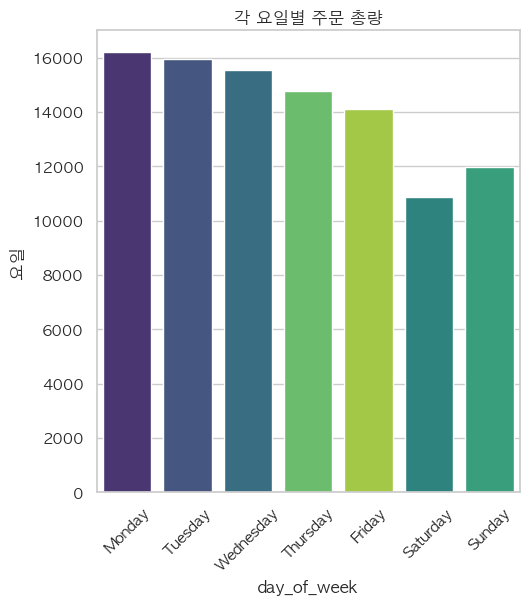

In [282]:
# 요일별/시간대별 주문량 집계 및 시각화
# 요일 순서 정의 (그래프 정렬용)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.subplot(1, 2, 1)
sns.countplot(data=olist_orders, x='day_of_week', palette='viridis', order=days_order, hue='day_of_week')
plt.title('각 요일별 주문 총량')
plt.ylabel('주문 총량')
plt.ylabel('요일')
plt.xticks(rotation=45)

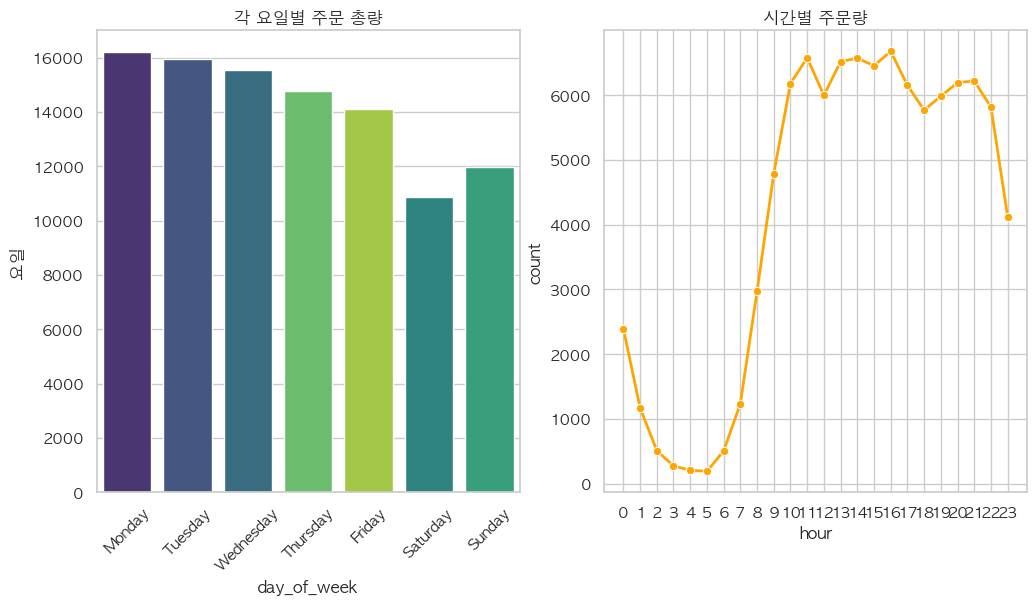

In [283]:
# 요일별/시간대별 주문량 집계 및 시각화
# 요일 순서 정의 (그래프 정렬용)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 요일별 주문량
plt.subplot(1, 2, 1)
sns.countplot(data=olist_orders, x='day_of_week', palette='viridis', order=days_order, hue='day_of_week')
plt.title('각 요일별 주문 총량')
plt.ylabel('주문 총량')
plt.ylabel('요일')
plt.xticks(rotation=45)

# 시간대별 주문량
# 시간대별 집계
hourly_counts = olist_orders.groupby('hour').size().reset_index(name='count')

plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='count', data=hourly_counts, marker='o', color='orange', linewidth=2)
plt.title('시간별 주문량')
# 눈금
plt.xticks(range(0, 24))
plt.show()

In [284]:
# 요일과 시간의 교차점을 파악하기 위해 피벗 테이블과 히트맵을 사용해본다.
heatmap_data = olist_orders.pivot_table(index='day_of_week', columns='hour', values='order_id', aggfunc='count')
heatmap_data

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,426,216,72,49,40,36,97,206,493,768,...,961,979,974,817,723,784,738,726,702,512
Monday,328,134,66,36,21,22,69,160,479,783,...,1096,1079,1094,992,928,945,1027,1118,991,717
Saturday,315,175,67,43,25,24,53,106,249,434,...,677,722,697,701,710,756,730,654,550,429
Sunday,267,141,69,44,27,27,34,105,205,349,...,684,716,712,797,895,899,967,889,873,607
Thursday,355,167,75,39,31,28,85,220,502,758,...,977,928,1077,909,784,826,839,840,857,551
Tuesday,306,158,80,28,29,24,71,223,522,864,...,1124,1047,1081,967,877,924,988,1027,965,692
Wednesday,397,179,81,33,33,27,93,211,517,829,...,1050,983,1040,967,852,848,904,963,878,615


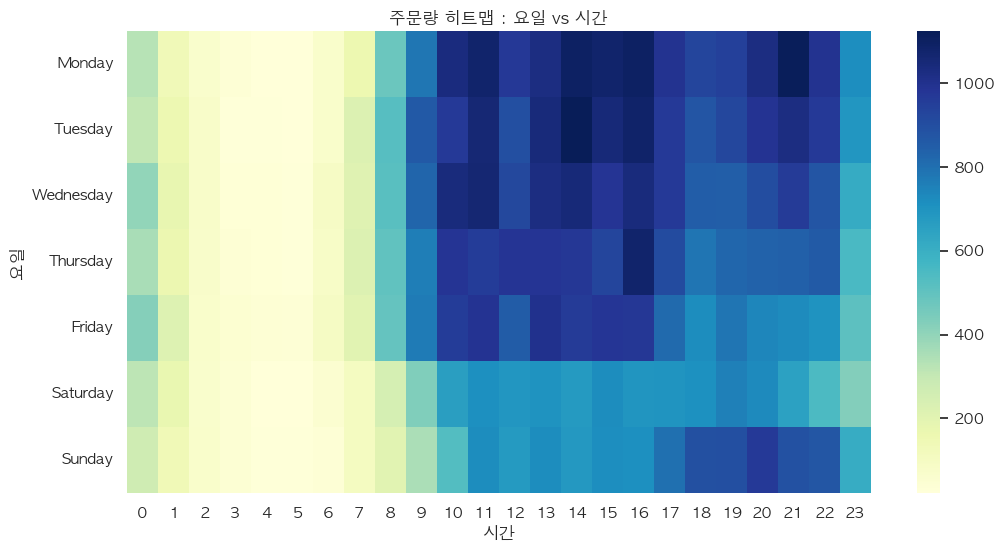

In [285]:
# 요일 순서대로 재정렬
heatmap_data = heatmap_data.reindex(days_order)

# 히트맵을 그려본다.
sns.heatmap(data=heatmap_data, cmap='YlGnBu', annot=False)
plt.title('주문량 히트맵 : 요일 vs 시간')
plt.ylabel('요일')
plt.xlabel('시간')
plt.show()

1. 월요일 효과 (Monday Effect) 
- 월요일에 주문량이 가장 많고, 주 후반(금, 토, 일)으로 갈 수록 주문량이 감소하는 경향이 있다.
- 특히 주말(토, 일)의 주문량은 평일 대비 눈에 띄게 낮다.
- 추측 : B2B 주문이 섞여 있거나, 소비자들이 주말에는 쇼핑보다 다른 활동 (여가 활동 등)을 즐기기 때문일 수도 있다.

2. 피크 시간대
- 오전 10시 ~ 오후 4시 사이의 일과 시간에 주문이 꾸준히 높게 유지된다.
- 오후 9시 ~ 10시 사이에도 작은 피크가 있을 수 있다(추측. 퇴근 후 쇼핑)
- 새벽1시 ~ 6시 사에는 주문이 거의 없다

3. 마케팅 방안
- 월요일 또는 화요일 오전 10시쯤 마케팅 메시지나 홍보를 적극적으로 한다.
- 주말 매출을 끓어 올리기 위해 주말 프로모션 등의 행사를 기획해야 한다.

### 객단가(AOV) 분석 : 1회 주문시 평균 결제 금액

1. 분석 개요
- 개념 : AOV(Average Order Value)는 고객이 한 번 주문할 때 평균적으로 얼마를 지출하지를 나타내는 지표이다
- AOV = 총 매출 / 총 주문수
- 목표 : 우리 서비스의 '평균적인 주문 규모'를 파악하고, 고가 구매 고객과 소액 구매 고객의 분포를 이해한다.

In [286]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')

In [287]:
# 배송까지 완료된 제품만 확인한다.
delivered_orders = olist_orders.query('order_status == "delivered"')
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [288]:
# 주문별 총 결제 금액 계산
order_values = olist_order_payments.groupby('order_id')['payment_value'].sum()
order_values = order_values.reset_index()
order_values

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [289]:
#유효 주문과 결제 데이터 병합
aov_data = pd.merge(valid_orders, order_values, left_on='order_id', right_on='order_id', how='inner')
aov_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62
...,...,...,...,...,...,...,...,...,...
98201,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,85.08
98202,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,195.00
98203,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,271.01
98204,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,441.16


In [290]:
#유효 주문과 결제 데이터 병합
# aov_data = pd.merge(valid_orders, order_values, left_on='order_id', right_on='order_id', how='inner')
# aov_data.info()

In [291]:
#유효 주문과 결제 데이터 병합
aov_data = pd.merge(delivered_orders, order_values, left_on='order_id', right_on='order_id', how='inner')
aov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96477 entries, 0 to 96476
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96477 non-null  object 
 1   customer_id                    96477 non-null  object 
 2   order_status                   96477 non-null  object 
 3   order_purchase_timestamp       96477 non-null  object 
 4   order_approved_at              96463 non-null  object 
 5   order_delivered_carrier_date   96475 non-null  object 
 6   order_delivered_customer_date  96469 non-null  object 
 7   order_estimated_delivery_date  96477 non-null  object 
 8   payment_value                  96477 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.6+ MB


In [292]:
# 기술 통계량 출력
stats = aov_data['payment_value'].describe()
print("==== 주문 금액 통계 (단위 : BRL) ====")
print(f'평균 AOV : {stats['mean']:.2f}')
print(f'중앙값 : {stats['50%']:.2f}')
print(f'최소값 : {stats['min']:.2f}')
print(f'최대값 : {stats['max']:.2f}')

==== 주문 금액 통계 (단위 : BRL) ====
평균 AOV : 159.86
중앙값 : 105.28
최소값 : 9.59
최대값 : 13664.08


In [293]:
# 기술 통계량 출력
stats = aov_data['payment_value'].describe()
print("==== 주문 금액 통계 (단위 : BRL) ====")
print(f'평균 AOV : {stats['mean']:.2f}')
print(f'중앙값 : {stats['50%']:.2f}')
print(f'최소값 : {stats['min']:.2f}')
print(f'최대값 : {stats['max']:.2f}')

# 평균과 중앙값의 차이 확인
if stats['mean'] > stats['50%'] :
    print()
    print('평균이 중앙값 보다 큽니다')
    print('이는 소수의 고액 주문이 평균을 끌어올리고 있음을 의미한다.')

==== 주문 금액 통계 (단위 : BRL) ====
평균 AOV : 159.86
중앙값 : 105.28
최소값 : 9.59
최대값 : 13664.08

평균이 중앙값 보다 큽니다
이는 소수의 고액 주문이 평균을 끌어올리고 있음을 의미한다.


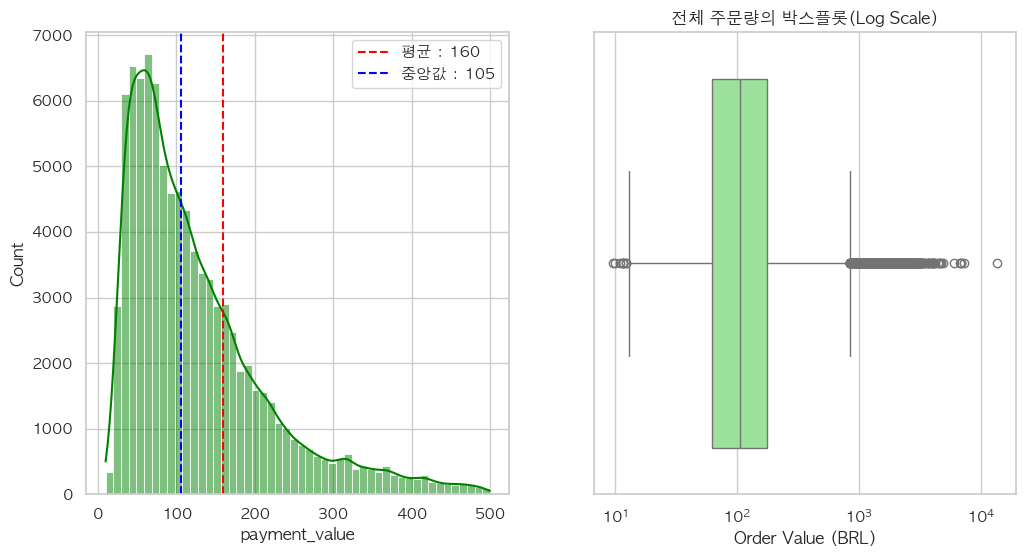

In [294]:
# 시각화
# 소수의 고액 주문이 평균을 끌어올리고 있는지 데이터의 분포를 확인한다.

# 히스토그램
# 중앙값 위치와 평균 위치를 비교해 본다.
plt.subplot(1, 2, 1)
# payment_value의 개수가 매우 적은 값이 큰 구간 때문에 대부분의 데이터가 몰려있는 부분이
# 잘 보이지 않는다. 중앙값과 평균 비교를 위해 500 이하로 제한을 둔다.
temp_data = aov_data.query('payment_value < 500')
sns.histplot(temp_data['payment_value'], bins=50, kde=True, color='green')
# 평균 지점을 표시한다.
plt.axvline(stats['mean'], color='red', linestyle='--', label=f'평균 : {stats['mean']:.0f}')
# 중앙값 지점을 표시한다.
plt.axvline(stats['50%'], color='blue', linestyle='--', label=f'중앙값 : {stats['50%']:.0f}')
plt.legend()


# 극단치가 있는지 확인하기 위해 boxplot을 그려본다.
plt.subplot(1, 2, 2)
# 값의 차이가 너무 심하면 로그변환을 해서 시각화를 해준다.
plt.xscale('log')
sns.boxplot(x=aov_data['payment_value'], color='lightgreen')
plt.title('전체 주문량의 박스플롯(Log Scale)')
plt.xlabel('Order Value (BRL)')
plt.show()

### 분석 결과 해석
1. AOV 수치 : Olist의 평균 객단가는 약 160 BRL (브라질 해알) 수준입니다.

2. 분포의 비대칭성
- 평균(160)이 중앙값(105) 보다 상당히 높은 편이다
- 이는 전형적인 Right Skewed (오른쪽으로 꼬리가 긴) 분포이다.
- 즉 대다수의 고객들은 50 ~ 150 BRL 사이의 저렴한 상품을 구매한다.
- 일부 고객이 수천 해알짜리 고가 상품을 구매하여 전체 평균을 끌어 올리고 있다.

3. 비즈니스 적용
- 마케팅 예산을 짤 때 '평균'인 160 BRL을 기준으로 잡으면 예산이 과다 책정될 위험이 있다.
- 일반적인 고객을 타겟팅 하려면 중앙값인 100~110BRL 수준을 기준으로 삼아야 한다.
- 13000 BRL이 넘는 초고가 주문도 존재한다. 이러한 VIP 고객을 위한 별도 관리 프로그램이 필요할 수도 있다.

- 로그 스케일 : 금액 데이터는 10원 부터 1억원까지 범위가 매우 넓은 경우가 많다. 이 때, 일반적인 그래프를 그리면 작은 값들이 뭉쳐서 보이지 않는다. 이 때, 로그 케이일 변을 사용하면 넓은 범위를 한눈에 보기 좋습니다.

### 고객 행동 분석
1. 분석 개요 : 비즈니스 성장을 위해서는 모든 고객을 동일하게 대우하는 것이 아니라, 고객의 가치와 행동 패턴에 따라 세분화 하여 맞춤형 전략을 수립해야 한다.

2. 핵심 주제
- RFM 분석 : 고객 가치 평가의 표준 프레임워크(Recency, Frequency, Monetary)
- 재구매율 (repurchase Rate) : 충성도 측정
- 지역별 분포 : 고객의 물리적 위치를 시각화

### RFM 분석 및 재구매율 실습
1. RFM 정의
- Recency (최근성) : 마지막 구매일로 부터 며칠이 지났는가..(낮을 수록 좋음)
- Frequency (빈도) : 특정 기간 동안 몇 번을 구매했는가..(높을 수록 좋음)
- Monetary (금액) : 총 얼마를 지출했는가? (높을 수록 좋음)

In [295]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')

In [296]:
# 날짜 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [297]:
# 배송 완료된 주문만 가져온다.
delivered_orders = olist_orders.query('order_status == "delivered"')
delivered_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [298]:
# 3개의 데이터 프레임을 합친다.
df = pd.merge(delivered_orders, olist_customers, left_on='customer_id', right_on='customer_id', how='inner')
df = pd.merge(olist_order_payments, df, left_on='order_id', right_on='order_id', how='inner')
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,4291db0da71914754618cd789aebcd56,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100751,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR
100752,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
100753,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
100754,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ


In [299]:
# RFM 지표 계산
# 기준일 (NOW) : 데이터의 가장 마지막 날짜 + 1일
now_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
now_date

Timestamp('2018-08-30 15:00:37')

In [300]:
# RFM 지표 계산
# 기준일 (NOW) : 데이터의 가장 마지막 날짜 + 1일
now_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
now_date

Timestamp('2018-08-30 15:00:37')

In [301]:
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp' : lambda x : (now_date - x.max()).days,
    'order_id' : 'nunique',
    'payment_value' : 'sum'
})

rfm2 = rfm.reset_index()
rfm2.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetrary']
rfm2

,customer_unique_id,Recency,Frequency,Monetrary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
93352,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42
93353,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
93354,ffff371b4d645b6ecea244b27531430a,568,1,112.46
93355,ffff5962728ec6157033ef9805bacc48,119,1,133.69


customer_unique_id 가 "0000366f3b9a7992bf8c76cfdf3221e2" 인 회원은 112일 동안 1번의 구매가 이루어졌는데 총 금액은 141.90
이다.

이런 형태로 해석해주세요

customer_unique_id 가 "0000366f3b9a7992bf8c76cfdf3221e2" 인 회원은 112일전에 첫 구매가 발생했고 112일 전부터 현재까지 1번의 구매가 이루어졌는데 총 금액은 141.90이다.

이런 형태로 해석해주세요

customer_unique_id 가 "0000366f3b9a7992bf8c76cfdf3221e2" 인 회원은 112일전에 마지막 구매가 발생했고 총 1번의 구매가 이루어졌는데 총 금액은 141.90이다.

이런 형태로 해석해주세요

In [302]:
print("==== RFM 요약 통계 ====")
print(rfm2.describe())

# 재 재구매율 계산
# 구매 건수가 2건 이상인 사람들의 수
reorder_count = rfm2.query('Frequency > 1').shape[0]
# 전체 고객수
total_customers = rfm2.shape[0]
# 재구매율
repurchase_rate = (reorder_count / total_customers) * 100

print("==== 재구매율 분석 ====")
print(f"재구매 고객 수 : {reorder_count}명")
print(f'전체 고객수 : {total_customers}명')
print(f'재구매율 : {repurchase_rate:.3f}%')

==== RFM 요약 통계 ====
            Recency     Frequency     Monetrary
count  93357.000000  93357.000000  93357.000000
mean     237.936673      1.033420    165.198772
std      152.584315      0.209099    226.314579
min        1.000000      1.000000      9.590000
25%      114.000000      1.000000     63.060000
50%      219.000000      1.000000    107.780000
75%      346.000000      1.000000    182.560000
max      695.000000     15.000000  13664.080000
==== 재구매율 분석 ====
재구매 고객 수 : 2801명
전체 고객수 : 93357명
재구매율 : 3.000%


- 재 구매율이 매우 낮음(3%)
- 이는 단발성 구매가 많은 오픈 마켓의 특성이거나, 특정 시기의 데이터만 포함되었기 때문일 수 있다.(데이터 분석할 때는 최소 5개년 이상을 확보해서 분석해주세요)
- 신규 고객 유치도 중요하지만 재 구매율을 높히기 위한 마케팅이 시급한 상황임.

### 지도 시각화
1. 산점도를 통해 지도 모양으로 그린다.
2. 지도 그리는 라이브러리를 활용한다.

In [303]:
# 주 별로 고객 수 집계
stats_counts = olist_customers['customer_state'].value_counts().reset_index()
stats_counts.columns = ['state', 'count']
stats_counts

,state,count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [304]:
# 지도 시각화를 위한 좌표 데이터 준비
# 중복된 데이터가 있으므로 우편번호를 기준으로 그룹을 묶고 각 그룹에서 첫 번째 행만 가져온다.
geo_data = olist_geolocation.groupby('geolocation_zip_code_prefix').first().reset_index()
# 데이터 프레임을 병합한다.
customers_geo = pd.merge(olist_customers, geo_data, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
customers_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP
...,...,...,...,...,...,...,...,...,...,...
99158,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,-23.587901,-46.501830,são paulo,SP
99159,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,-23.612294,-46.765787,taboao da serra,SP
99160,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,-3.744128,-38.510859,fortaleza,CE
99161,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,-29.956391,-51.167614,canoas,RS


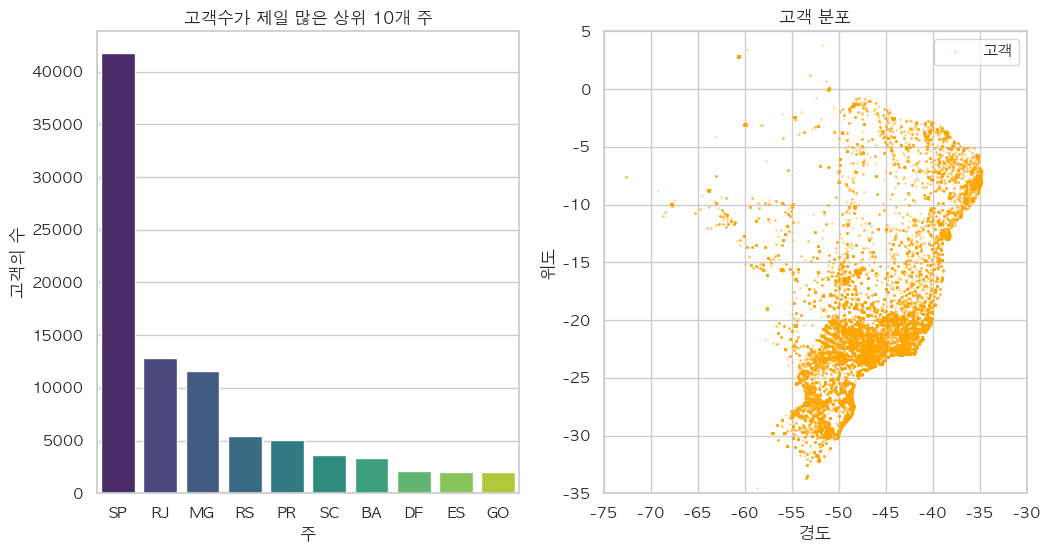

In [305]:
# top 10 주 막대 그래프
plt.subplot(1, 2, 1)
sns.barplot(data=stats_counts.head(10), x='state', y='count', palette='viridis', hue='state')
plt.title('고객수가 제일 많은 상위 10개 주')
plt.ylabel("고객의 수")
plt.xlabel("주")

# 위도/경로를 활용하여 산점도를 그린다.
plt.subplot(1, 2, 2)
plt.scatter(customers_geo['geolocation_lng'], customers_geo['geolocation_lat'], alpha=0.3, s=1, c='orange', label='고객')
plt.title('고객 분포')
plt.xlabel('경도')
plt.ylabel('위도')
plt.xlim(-75, -30)
plt.ylim(-35, 5)
plt.legend()

plt.show()

In [306]:
# 지도 히트맵
# 라이브러리 설치
# pip install folium

In [307]:
# 지도 히트맵
# 라이브러리 설치
# pip install folium
import folium
from folium.plugins import HeatMap

In [308]:
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_geolocation = pd.read_csv('olist/olist_geolocation_dataset.csv')

In [309]:
# 좌표 데이터 중복 제거
geo_data = olist_geolocation.groupby('geolocation_zip_code_prefix').first().reset_index()
geo_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP
3,1004,-23.550116,-46.635122,sao paulo,SP
4,1005,-23.549819,-46.635606,sao paulo,SP
...,...,...,...,...,...
19010,99960,-27.953797,-52.029641,charrua,RS
19011,99965,-28.173892,-52.038447,agua santa,RS
19012,99970,-28.345143,-51.876926,ciriaco,RS
19013,99980,-28.389218,-51.846012,david canabarro,RS


In [310]:
# 병합한다.
customers_geo = pd.merge(olist_customers, geo_data, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
customers_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.726853,-46.545746,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.527788,-46.660310,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.496930,-46.185352,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073,campinas,SP
...,...,...,...,...,...,...,...,...,...,...
99158,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,-23.587901,-46.501830,são paulo,SP
99159,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,-23.612294,-46.765787,taboao da serra,SP
99160,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,-3.744128,-38.510859,fortaleza,CE
99161,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,-29.956391,-51.167614,canoas,RS


In [311]:
# 지도를 표시한다.
# location : 지도의 중심점 위도와 경도 (브라질의 대략적인 중앙 위치)
# zoom_start : 시작 줌 배율
m = folium.Map(location=[-14.235, -51.925], zoom_start=4)
# 지도를 html 파일로 저장한다.
display(m)

In [312]:
# 지도를 표시한다.
# location : 지도의 중심점 위도와 경도 (브라질의 대략적인 중앙 위치)
# zoom_start : 시작 줌 배율
m = folium.Map(location=[-14.235, -51.925], zoom_start=4)

# 지도에 히트맵 레이어를 추가한다.
# HeatMap 플러그인은 [[위도, 경도, 가중치]...] 형태의 리스트를 입력받는다.
# 지정된 위도, 경도 위치에 지정한 가중치 만큼 크기, 색상 등을 이용하여 수치의 높고 낮음을 표시해준다.
# 여기에서는 가중치 없이 밀도만 볼 것이기 때문에 [위도, 경도]만 전달한다.
test1 = customers_geo.head(10)
head_data = test1[['geolocation_lat', 'geolocation_lng']].values.tolist()

HeatMap(head_data, radius=15, blur=20).add_to(m)

# 지도를 html 파일로 저장한다.
m.save('olist_customer_heatmap.html')
display(m)

### 초급 문제

### 문제1) 2017년 매출 Top 5 카테고리를 출력한다.
- 2017년 매출만 해당한다.
- 2017년 매출 상위 5개의 카테고리 데이터를 가져와 출력한다.
- 순위별로 카테고리 이름과 매출총액을 출력한다.

### 문제2) 결제 수단별 사용 비율

### 문제3) 배송 미완료 주문 비율 
- 배송 상태가 delivered가 아닌 주문의 비율

In [313]:
#2017년 매출 Top 5 카테고리를 출력한다.

# 데이터를 불러온다.
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [314]:
# 날짜 형식 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [315]:
olist_orders['year'] = olist_orders['order_purchase_timestamp'].dt.year
olist_orders['year'].value_counts()

year
2018    54011
2017    45101
2016      329
Name: count, dtype: int64

In [316]:
olist_orders_17 = olist_orders.query('year == 2017')
olist_orders_17

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017
...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2017
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,2017
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,2017
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017


In [317]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [318]:
olist_17 = pd.merge(olist_orders_17,olist_order_items,on='order_id',how='inner')
olist_17

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.90,16.05
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2017,2,49d2e2460386273b195e7e59b43587c3,1caf283236cd69af44cbc09a0a1e7d32,2017-10-10 20:07:14,26.90,36.98
50860,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,2017,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,19.43
50861,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,2017,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,16.09
50862,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08


In [319]:
olist_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50864 entries, 0 to 50863
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       50864 non-null  object        
 1   customer_id                    50864 non-null  object        
 2   order_status                   50864 non-null  object        
 3   order_purchase_timestamp       50864 non-null  datetime64[ns]
 4   order_approved_at              50849 non-null  object        
 5   order_delivered_carrier_date   50121 non-null  object        
 6   order_delivered_customer_date  49554 non-null  object        
 7   order_estimated_delivery_date  50864 non-null  object        
 8   year                           50864 non-null  int32         
 9   order_item_id                  50864 non-null  int64         
 10  product_id                     50864 non-null  object        
 11  seller_id      

In [320]:
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [321]:
olist_17_1 = pd.merge(olist_17,olist_products,on='product_id',how='inner')
olist_17_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_item_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,1,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,1,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017,1,...,147.90,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0
3,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017,1,...,49.90,16.05,NaN,NaN,NaN,NaN,600.0,35.0,35.0,15.0
4,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017,1,...,59.99,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2017,2,...,26.90,36.98,brinquedos,40.0,180.0,3.0,750.0,26.0,15.0,26.0
50860,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,2017,1,...,370.00,19.43,beleza_saude,48.0,657.0,1.0,750.0,38.0,12.0,25.0
50861,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,2017,1,...,139.90,16.09,moveis_decoracao,63.0,254.0,2.0,2500.0,49.0,13.0,41.0
50862,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,1,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [322]:
olist_17_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50864 entries, 0 to 50863
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       50864 non-null  object        
 1   customer_id                    50864 non-null  object        
 2   order_status                   50864 non-null  object        
 3   order_purchase_timestamp       50864 non-null  datetime64[ns]
 4   order_approved_at              50849 non-null  object        
 5   order_delivered_carrier_date   50121 non-null  object        
 6   order_delivered_customer_date  49554 non-null  object        
 7   order_estimated_delivery_date  50864 non-null  object        
 8   year                           50864 non-null  int32         
 9   order_item_id                  50864 non-null  int64         
 10  product_id                     50864 non-null  object        
 11  seller_id      

In [323]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [324]:
olist_17_final = pd.merge(olist_17_1,product_category_name_translation,on='product_category_name',how='inner')
olist_17_final

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,order_item_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017,1,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017,1,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017,1,...,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,auto
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017,1,...,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,auto
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,2017,1,...,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49938,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2017,2,...,36.98,brinquedos,40.0,180.0,3.0,750.0,26.0,15.0,26.0,toys
49939,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00,2017,1,...,19.43,beleza_saude,48.0,657.0,1.0,750.0,38.0,12.0,25.0,health_beauty
49940,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00,2017,1,...,16.09,moveis_decoracao,63.0,254.0,2.0,2500.0,49.0,13.0,41.0,furniture_decor
49941,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017,1,...,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty


In [325]:
olist_17_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49943 entries, 0 to 49942
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       49943 non-null  object        
 1   customer_id                    49943 non-null  object        
 2   order_status                   49943 non-null  object        
 3   order_purchase_timestamp       49943 non-null  datetime64[ns]
 4   order_approved_at              49929 non-null  object        
 5   order_delivered_carrier_date   49228 non-null  object        
 6   order_delivered_customer_date  48675 non-null  object        
 7   order_estimated_delivery_date  49943 non-null  object        
 8   year                           49943 non-null  int32         
 9   order_item_id                  49943 non-null  int64         
 10  product_id                     49943 non-null  object        
 11  seller_id      

In [326]:
# 카테고리별 매출(= price 합) 집계
cat_sales_2017 = (
    olist_17_final
    .groupby(['product_category_name_english'], as_index=False)
    .agg(
        sales=('price', 'sum'),
        orders=('order_id', 'nunique'),   # 주문 수(중복 제거)
        items=('order_item_id', 'count')  # 아이템 라인 수
    )
    .sort_values('sales', ascending=False)
)

# Top 5
top5 = cat_sales_2017.head(5)
top5


,product_category_name_english,sales,orders,items
7,bed_bath_table,498440.43,4503,5223
70,watches_gifts,492794.50,2126,2283
43,health_beauty,481755.71,3389,3668
65,sports_leisure,452148.84,3643,4095
15,computers_accessories,405078.69,2618,3098


In [327]:
olist_17_final['revenue'] = olist_17_final['price'] + olist_17_final['freight_value']

top5_with_freight = (
    olist_17_final
    .groupby('product_category_name_english', as_index=False)
    .agg(revenue=('revenue', 'sum'))
    .sort_values('revenue', ascending=False)
    .head(5)
)

top5_with_freight


,product_category_name_english,revenue
7,bed_bath_table,590280.44
43,health_beauty,550420.11
65,sports_leisure,530730.03
70,watches_gifts,530086.82
15,computers_accessories,462761.27


In [328]:
top5.style.format({'sales': '{:,.0f}', 'orders': '{:,}', 'items': '{:,}'})


,product_category_name_english,sales,orders,items
7,bed_bath_table,"498,440","4,503","5,223"
70,watches_gifts,"492,794","2,126","2,283"
43,health_beauty,"481,756","3,389","3,668"
65,sports_leisure,"452,149","3,643","4,095"
15,computers_accessories,"405,079","2,618","3,098"


---

In [329]:
# 문제2) 결제 수단별 사용 비율
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')

In [330]:
payment_ratio = (
    olist_order_payments['payment_type']
    .value_counts(normalize=True)
    .reset_index()
)

payment_ratio.columns = ['payment_type', 'ratio']
payment_ratio

,payment_type,ratio
0,credit_card,0.739224
1,boleto,0.190440
2,voucher,0.055590
3,debit_card,0.014718
4,not_defined,0.000029


---

In [331]:
# 문제3) 배송 미완료 주문 비율 
# - 배송 상태가 delivered가 아닌 주문의 비율

olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [332]:
status_ratio = (
    olist_orders['order_status'].value_counts(normalize=True).reset_index()
)

status_ratio.columns=['status','ratio']

not_delivered= (
    status_ratio.query("status != 'delivered'")['ratio'].sum()
)

not_delivered

np.float64(0.02979656278597359)

In [333]:
status_ratio


,status,ratio
0,delivered,0.970203
1,shipped,0.011132
2,canceled,0.006285
3,unavailable,0.006124
4,invoiced,0.003158
5,processing,0.003027
6,created,0.000050
7,approved,0.000020


In [334]:
not_delivered_ratio = (olist_orders['order_status'] != 'delivered').mean()
not_delivered_ratio

np.float64(0.029796562785973594)

---
---

### 3. 상품 및 카테고리 분석
1. 분석 개요
- 베스트 셀러 분석 : 매출과 판매량 측명에서 상위 카테고리를 파악한다 (비싼게 제일 잘 팔리는지.. 싼 게 많이 팔리는지..)
- 장바구니 분석 : 함께 자주 구매되는 상품의 조합을 찾아내어 추천 시스템이나 번들 상품 기획에 활용한다.

### 2. 베스트 셀러 카테고리 분석

In [335]:
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [336]:
# 데이터를 병합한다.
df = pd.merge(olist_order_items, olist_products, left_on='product_id', right_on='product_id', how='inner')
df = pd.merge(df, product_category_name_translation, left_on='product_category_name', right_on='product_category_name', how='inner')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
111019,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
111020,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
111021,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [337]:
# 결측치 확인
df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [338]:
# 상위 카테고리 추출
# 카테고리 이름(product_category_name_english)으로 그룹을 묶은 다음 그룹별 가격(price)의 총합을 구한다.
a1 = df.groupby('product_category_name_english')['price'].sum()
# 매출 총합을 기준으로 정렬한다.
a2 = a1.sort_values(ascending=False)
# 상위 10개를 추출한다.
top_revenue = a2.head(10)
top_revenue

product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64

In [339]:
# 카테고리별 판매량을 구한다.
a1 = df['product_category_name_english'].value_counts()
# 상위 10개를 가져온다.
top_volume = a1.head(10)
top_volume

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

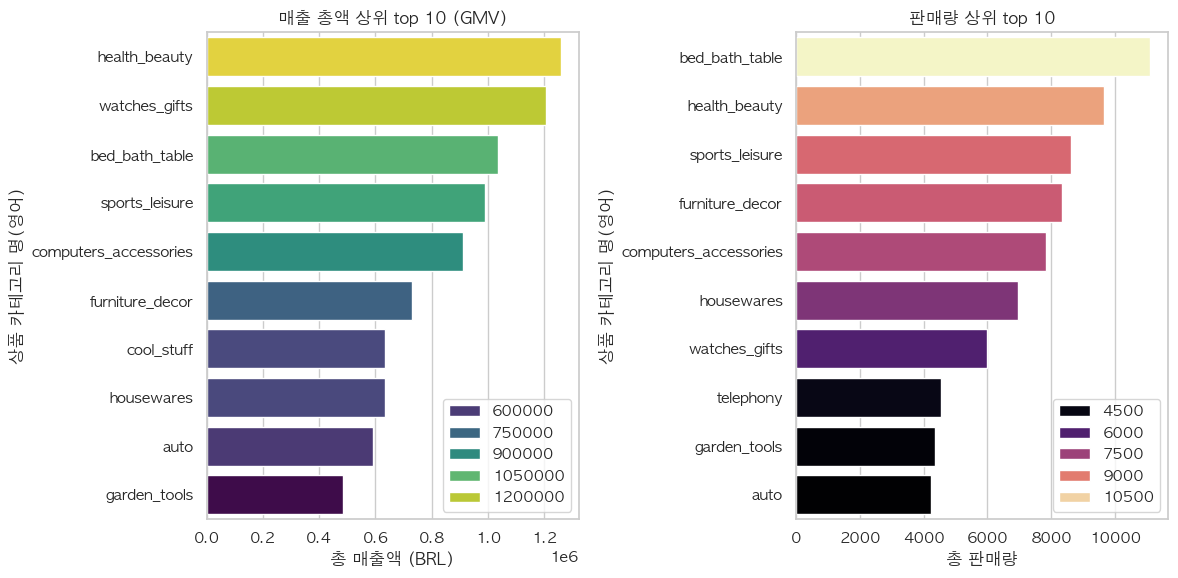

In [340]:
plt.subplot(1, 2, 1)
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='viridis', hue=top_revenue.values)
plt.title("매출 총액 상위 top 10 (GMV)")
plt.xlabel('총 매출액 (BRL)')
plt.ylabel('상품 카테고리 명(영어)')

plt.subplot(1, 2, 2)
sns.barplot(x=top_volume.values, y=top_volume.index, palette='magma', hue=top_volume.values)
plt.title("판매량 상위 top 10")
plt.xlabel('총 판매량')
plt.ylabel('상품 카테고리 명(영어)')

plt.tight_layout()
plt.show()

In [341]:
# 매출 top10에 속한 상품들의 카테고리
a1 = top_revenue.index
# 판매량 top10에 속한 상품들의 카테고리
a2 = top_volume.index
# 중복을 제외하고 하나로 합친다.
a3 = top_revenue.index.to_list()
a4 = top_volume.index.to_list()
a5 = a3 + a4
a6 = np.unique(a5)
# 중복을 제외한 카테고리 이름에 해당하는 상품들을 가져온다
df2 = df.query('product_category_name_english in @a6')
# 카테고리 이름을 기준으로 그룹을 묶은 다음 가격 평균을 구한다.
price_mean = df2.groupby('product_category_name_english')['price'].mean()
# 오름차순 정렬을 한다.
price_mean = price_mean.sort_values()
price_mean

product_category_name_english
telephony                 71.213978
furniture_decor           87.564494
housewares                90.788148
bed_bath_table            93.296327
garden_tools             111.630196
sports_leisure           114.344285
computers_accessories    116.513903
health_beauty            130.163531
auto                     139.957523
cool_stuff               167.357969
watches_gifts            201.135984
Name: price, dtype: float64

- cool_stuff (매출 top 10) 과 telephony (판매량 top 10) 을 제외한 모든 카테고리가 양쪽 모두 존재하고 있다.
- 비교적 낮은 가격에 해당하는 카테고리 (bed_bath_table 등)이지만 판매량이 매우 많아서 매출 상위에 있는 상품이 존재한다.
- 비교적 낮은 판매량에 해당하는 카테고리 (watches_gifts 등)이지만 가격이 매우 높아서 매출 상위에 있는 상품이 존재한다.

### 3. 연관 구매 분석 (장바구니 분석)
- "침대를 산 사람들은 베개도 같이 살 것이다"라는 가설을 데이터로 검증해 봅시다

In [342]:
# 하나의 주문 (order_id)에 상품이 2개 이상인 것들만 살펴본다.
order_item_counts = df.groupby('order_id')['product_id'].count()
multi_items = order_item_counts[order_item_counts > 1].index
multi_items

Index(['0008288aa423d2a3f00fcb17cd7d8719', '00143d0f86d6fbd9f9b38ab440ac16f5',
       '001ab0a7578dd66cd4b0a71f5b6e1e41', '001d8f0e34a38c37f7dba2a37d4eba8b',
       '002c9def9c9b951b1bec6d50753c9891', '002f98c0f7efd42638ed6100ca699b42',
       '003324c70b19a16798817b2b3640e721', '00337fe25a3780b3424d9ad7c5a4b35e',
       '003822434f91204da0a51fe4cf2aba18', '003f201cdd39cdd59b6447cff2195456',
       ...
       'ffb8f7de8940249a3221252818937ecb', 'ffb9a9cd00c74c11c24aa30b3d78e03b',
       'ffc16cecff8dc037f60458f28d1c1ba5', 'ffd543c2b60842e148a86870dc60e212',
       'ffd6f465cab015b452d398ac1f5d978a', 'ffd84ab39cd5e873d8dba24342e65c01',
       'ffe4b41e99d39f0b837a239110260530', 'ffecd5a79a0084f6a592288c67e3c298',
       'fff8287bbae429a99bb7e8c21d151c41', 'fffb9224b6fc7c43ebb0904318b10b5f'],
      dtype='object', name='order_id', length=9652)

In [343]:
# 주문별 구매 카테고리 리스트 생성
# 예) 하나의 주문에서 상품 A와 상품 B를 주문 했다면
# ['상품A', '상품B'] 형태로 만들어준다.

# 주문 번호가 위에서 구한 2개 이상의 상품을 주문한 상품의 정보만 가져온다.
df_basket = df.query('order_id in @multi_items')
df_basket = df_basket.reset_index(drop=True)
df_basket

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0008288aa423d2a3f00fcb17cd7d8719,1,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
1,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,garden_tools
2,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
3,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
4,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,informatica_acessorios,53.0,871.0,4.0,175.0,20.0,20.0,20.0,computers_accessories
23415,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts
23416,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts
23417,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,watches_gifts


In [344]:
# 주문별 구매 카테고리 리스트 생성
# 예) 하나의 주문에서 상품 A와 상품 B를 주문 했다면
# ['상품A', '상품B'] 형태로 만들어준다.
basket = df_basket.groupby('order_id')['product_category_name_english'].apply(list)
basket

order_id
0008288aa423d2a3f00fcb17cd7d8719                         [garden_tools, garden_tools]
00143d0f86d6fbd9f9b38ab440ac16f5     [sports_leisure, sports_leisure, sports_leisure]
001ab0a7578dd66cd4b0a71f5b6e1e41              [electronics, electronics, electronics]
001d8f0e34a38c37f7dba2a37d4eba8b                       [health_beauty, health_beauty]
002c9def9c9b951b1bec6d50753c9891                             [housewares, housewares]
                                                          ...                        
ffd84ab39cd5e873d8dba24342e65c01       [computers_accessories, computers_accessories]
ffe4b41e99d39f0b837a239110260530                                         [toys, toys]
ffecd5a79a0084f6a592288c67e3c298              [electronics, electronics, electronics]
fff8287bbae429a99bb7e8c21d151c41       [computers_accessories, computers_accessories]
fffb9224b6fc7c43ebb0904318b10b5f    [watches_gifts, watches_gifts, watches_gifts, ...
Name: product_category_name_english, Length: 

In [345]:
from itertools import combinations
from collections import Counter

In [346]:
# 조합 카운팅을 위한 객체를 생성한다.
pair_counter = Counter()

# basket에 있는 주문의 수 만큼 반복한다.
for categories in basket :
    # 중복 제거 및 정렬 (같은 상품을 2개 이상 구매한 것은 제외하고, 서로 다른 카테고리의 조합만 본다)
    unique_categories = sorted(list(set(categories)))
    
    # 카테고리가 2개 이상일 때문 조합 생성
    if (len(unique_categories) >= 2) :
        # print(categories, unique_categories)
        # 하나의 list 안에 들어 있는 카테고리들을 2개씩 묶은 조합을 생성한다.
        a1 = combinations(unique_categories, 2)
        # 각 조합이 총 몇개씩 있는지 개수를 계산한다.
        pair_counter.update(a1)

# 결과 출력
print("=== 함께 가장 많이 팔린 카테고리 조합 Top 10 ===")
# counter.most_common(n) : 가장 많이 나오는 상위 n개의 데이터를 반환한다.
for pair, count in pair_counter.most_common(10) : 
    print(f'{pair} : {count}')

=== 함께 가장 많이 팔린 카테고리 조합 Top 10 ===
('bed_bath_table', 'furniture_decor') : 70
('bed_bath_table', 'home_confort') : 43
('furniture_decor', 'housewares') : 24
('bed_bath_table', 'housewares') : 20
('baby', 'cool_stuff') : 20
('baby', 'toys') : 19
('furniture_decor', 'garden_tools') : 17
('baby', 'bed_bath_table') : 17
('health_beauty', 'sports_leisure') : 14
('furniture_decor', 'home_construction') : 13


- ('bed_bath_table', 'furniture_decor') : 침구류와 가구 장식품을 함께 사는 경우가 가장 많다.
- ('baby', 'toys') : 유아용품과 장난감의 조합은 추측이 가능한 조합이었다.
- 대체적으로 침구류나 가구류, 집 꾸미는 용품들이 주류를 이루고 있다.
- 아이들과 관련된 용품들도 보인다.
- 운동이나 건강과 관련 상품 조합도 있다. : ('health_beauty', 'sports_leisure')

### 물류 및 배송 성능 분석
1. 분석 개요
- 배송 지연 분석 : 고객에게 약속한 날짜 보다 실제 배송이 늦어졌는지 분석하여 물류 리스크를 파악한다.
- 배송비 호율성 : 상품의 무게, 부피, 배송 거리가 배송비에 미치는 영향을 파악한다.

### 2. 배송 지연 분석
- 고객에게 "언제 도착할 것 같다"고 약속한 날짜와 실제 도착일을 비교해본다.

In [347]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')

In [348]:
# 날짜 변환
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])

olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [349]:
# 배송 완료된 건만 가져온다.
df_delivered = olist_orders.query('order_status == "delivered"')
df_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [350]:
# 배송 완료된 건만 가져온다.
df_delivered = olist_orders.query('order_status == "delivered"')
df_delivered['order_status'].value_counts()

order_status
delivered    96478
Name: count, dtype: int64

In [351]:
# 결측치 확인
df_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [352]:
# order_delivered_customer_date 가 결측치인 행을 제거한다.
df_delay = df_delivered.dropna(subset=['order_delivered_customer_date'])
df_delay.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [353]:
# 배송 지연날짜를 구해 컬럼으로 추가해 준다.
df_delay['delay_days'] = (df_delay['order_delivered_customer_date'] - df_delay['order_estimated_delivery_date']).dt.days
df_delay['delay_days'].value_counts()

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_3956/1343057147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['delay_days'] = (df_delay['order_delivered_customer_date'] - df_delay['order_estimated_delivery_date']).dt.days


delay_days
-14     7126
-13     5963
-15     5345
-7      4837
-8      4828
        ... 
 83        1
 67        1
 79        1
 159       1
-67        1
Name: count, Length: 198, dtype: int64

In [354]:
# - 도 있기 때문에 구분을 위해 지연 여부 컬럼을 추가한다.
df_delay['is_late'] = df_delay['delay_days'] > 0
df_delay['is_late'].value_counts()

/var/folders/w3/rml6l6xx3qjc4qvf58x_8ks00000gn/T/ipykernel_3956/623732971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['is_late'] = df_delay['delay_days'] > 0


is_late
False    89936
True      6534
Name: count, dtype: int64

In [355]:
# 주별 지연을 분석
# 고객 정보량 병합한다.
a1 = olist_customers[['customer_id', 'customer_state']]
df_delay = pd.merge(df_delay, a1, left_on='customer_id', right_on='customer_id', how='inner')
df_delay

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_days,is_late,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8,False,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6,False,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18,False,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13,False,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10,False,SP
...,...,...,...,...,...,...,...,...,...,...,...
96465,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-11,False,SP
96466,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,-2,False,SP
96467,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,-6,False,BA
96468,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,-21,False,RJ


In [356]:
# 주별 평균 지연율 계산한다.
# 통계량 값을 구하기 위해 사용할 컬럼이 True, False로 구성되어 있다면
# True는 1로, False는 0으로 취급하여 계산한다.
state_delay_rate = df_delay.groupby('customer_state')['is_late'].mean()
state_delay_rate = state_delay_rate.sort_values(ascending=False)
state_delay_rate

customer_state
AL    0.214106
MA    0.174338
SE    0.152239
PI    0.138655
CE    0.137608
RR    0.121951
BA    0.121622
RJ    0.121053
PA    0.112051
ES    0.107268
PB    0.104449
TO    0.098540
MS    0.097004
PE    0.096045
RN    0.092827
SC    0.082064
GO    0.065406
RS    0.060816
MT    0.059819
DF    0.056731
MG    0.045711
SP    0.044945
PR    0.040423
AC    0.037500
AP    0.029851
RO    0.028807
AM    0.027586
Name: is_late, dtype: float64

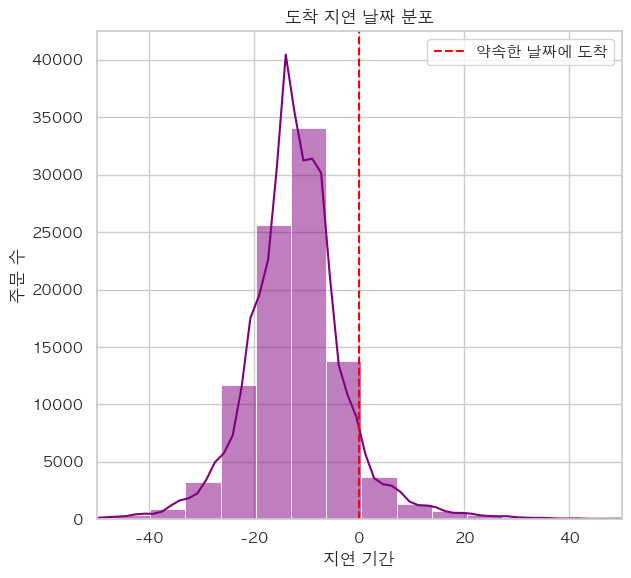

In [357]:
# 시각화

# 지연 일수 분포
plt.subplot(1, 2, 1)
sns.histplot(df_delay['delay_days'], bins=50, kde=True, color='purple')
plt.title('도착 지연 날짜 분포')
plt.xlabel('지연 기간')
plt.ylabel('주문 수')
plt.axvline(0, color='red', linestyle='--', label='약속한 날짜에 도착')
# 주문건수가 너무 적은 쪽 제외하고 본다.
plt.xlim(-50, 50)
plt.legend()


plt.tight_layout()
plt.show()

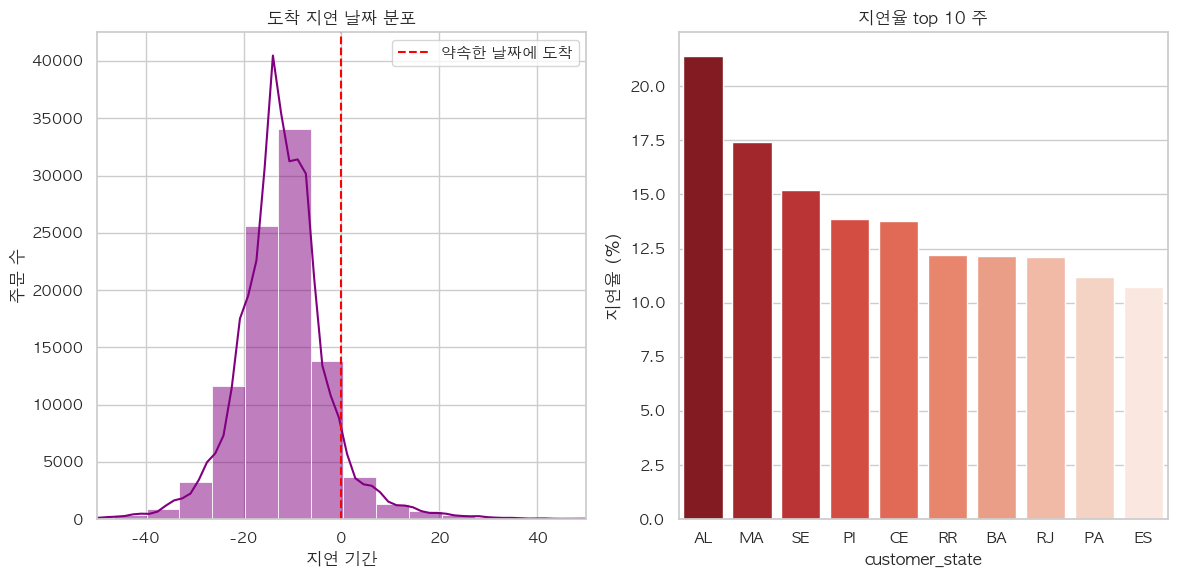

In [358]:
# 시각화

# 지연 일수 분포
plt.subplot(1, 2, 1)
sns.histplot(df_delay['delay_days'], bins=50, kde=True, color='purple')
plt.title('도착 지연 날짜 분포')
plt.xlabel('지연 기간')
plt.ylabel('주문 수')
plt.axvline(0, color='red', linestyle='--', label='약속한 날짜에 도착')
# 주문건수가 너무 적은 쪽 제외하고 본다.
plt.xlim(-50, 50)
plt.legend()

# 지연율이 높은 주 top 10
plt.subplot(1, 2, 2)
a100 = state_delay_rate.head(10)
sns.barplot(x=a100.index, y=a100.values * 100, palette='Reds_r', hue=a100.index)
plt.title('지연율 top 10 주')
plt.ylabel('지연율 (%)')


plt.tight_layout()
plt.show()

In [359]:
print(f'전체 평균 지연율 : {df_delay['is_late'].mean() * 100:.2f}%')

전체 평균 지연율 : 6.77%


- 약 93%의 주문이 예정보다 일찍 도착한다. 
- Olist는 배송 예정일을 실제보다 약 13일 정도 여유있게 잡고 있다.
- 지연 지역은 AL, MA 등과 같이 브라질 북동쪽 지역의 지연율이 상대적으로 높게 나타난다.

### 3. 배송비 효율성 및 상관관계 분석
- 배송비 책정에 가장 큰 영향을 미치는 요인이 무엇인지(무게 vs 거리)를 분석한다.

In [360]:
# 데이터를 가져온다.
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist/olist_sellers_dataset.csv')

In [361]:
# 데이터 프레임 병합
freight_df = pd.merge(olist_order_items, olist_products, left_on='product_id', right_on='product_id', how='inner')
freight_df = pd.merge(freight_df, olist_orders, left_on='order_id', right_on='order_id', how='inner')
freight_df = pd.merge(freight_df, olist_customers, left_on='customer_id', right_on='customer_id', how='inner')
freight_df = pd.merge(freight_df, olist_sellers, left_on='seller_id', right_on='seller_id', how='inner')
freight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [362]:
# 데이터를 가져온다.
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
olist_sellers = pd.read_csv('olist/olist_sellers_dataset.csv')
olist_geolocation = pd.read_csv('olist/olist_geolocation_dataset.csv')

In [363]:
freight_df = pd.merge(olist_order_items, olist_products, left_on='product_id', right_on='product_id', how='inner')
freight_df = pd.merge(freight_df, olist_orders, left_on='order_id', right_on='order_id', how='inner')
freight_df = pd.merge(freight_df, olist_customers, left_on='customer_id', right_on='customer_id', how='inner')
freight_df = pd.merge(freight_df, olist_sellers, left_on='seller_id', right_on='seller_id', how='inner')
freight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [364]:
# # 위치에 대한 우편번호, 위도, 경도 데이터를 가져온다.
# a1 = olist_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]
# # 고객의 우편번호와 위치의 우편번호의 조합으로 합친다.
# freight_df = pd.merge(freight_df, a1, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
# # 위도 경도의 컬럼 이름을 변경한다
# a3 = {
#     'geolocation_lat' : 'customer_lat',
#     'geolocation_lng' : 'customer_lng'
# }
# freight_df.rename(columns=a3, inplace=True)

# # 판매자의 우편번호와 위치의 우편번호의 조합으로 합친다.
# freight_df = pd.merge(freight_df, a1, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
# # 위도 경도의 컬럼 이름을 변경한다
# a3 = {
#     'geolocation_lat' : 'seller_lat',
#     'geolocation_lng' : 'sller_lng'
# }
# freight_df.rename(columns=a3, inplace=True)
# freight_df

In [365]:
# 거리 측정 예
a1 = olist_geolocation.iloc[0][['geolocation_lat', 'geolocation_lng']]
a2 = olist_geolocation.iloc[-1][['geolocation_lat', 'geolocation_lng']]

# 라이브러리
# pip install geopy
from geopy.distance import geodesic

lat1 = a1.loc['geolocation_lat']
lng1 = a1.loc['geolocation_lng']

lat2 = a2.loc['geolocation_lat']
lng2 = a2.loc['geolocation_lng']

# 지점 1 위도 경도
coords1 = (lat1, lng1)
# 지점 2 위도 경도
coords2 = (lat2, lng2)

# 두 지점간의 거리를 계산한다.
distance = geodesic(coords1, coords2)
print(distance.m)
print(distance.km)

736171.9428556601
736.1719428556601


In [366]:
# 부피 컬럼을 추가한다.
freight_df['volume_cm3'] = freight_df['product_length_cm'] * freight_df['product_height_cm'] * freight_df['product_width_cm']
freight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [367]:
# 같은 주 내 배송인지 아닌지를 구분한다.
# where : 첫 번째 식의 결과가 True면 두 번째 값이 반환되고 False 면 세번째 값이 반환된다.
freight_df['shipping_type'] = np.where(
    freight_df['customer_state'] == freight_df['seller_state'],
    'Same State',
    'Cross State'
)
freight_df['shipping_type'].value_counts()

shipping_type
Cross State    71894
Same State     40756
Name: count, dtype: int64

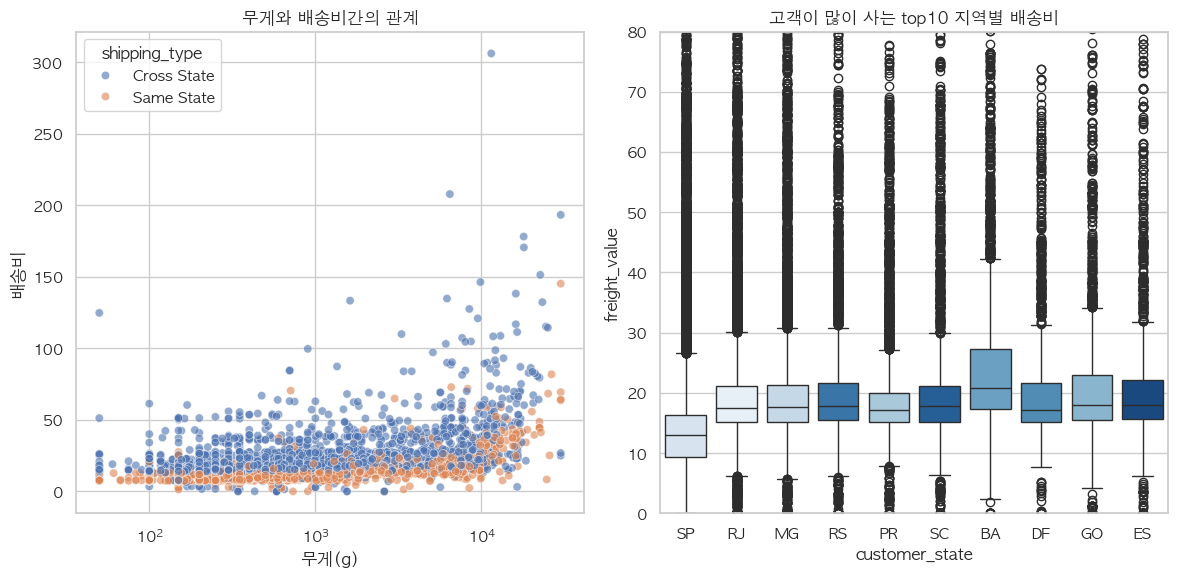

In [368]:
# 무게와 배송비(지역 타입별 색상 구분)
# 데이터가 많으므로 5000개만 샘플링하여 시각화
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=freight_df.sample(5000, random_state=42),
    x='product_weight_g',
    y='freight_value',
    hue='shipping_type',
    alpha=0.6
)
plt.title('무게와 배송비간의 관계')
plt.xlabel('무게(g)')
plt.ylabel('배송비')
plt.xscale('log')

# 지역별 배송비 분포(BoxPlot)
# 각 주별로 거주하고 있는 고객수 상위 10개의 주를 가져온다.
top_states = freight_df['customer_state'].value_counts().head(10).index
# 거주하고 있는 고객수 top10 의 주에 해당하는 데이터만 가져온다.
a1 = freight_df.query('customer_state in @top_states')

plt.subplot(1, 2, 2)
sns.boxplot(
    data=a1,
    x='customer_state',
    y='freight_value',
    order=top_states,
    palette='Blues',
    hue='customer_state'
)
plt.title('고객이 많이 사는 top10 지역별 배송비')
plt.ylim(0, 80)

plt.tight_layout()
plt.show()

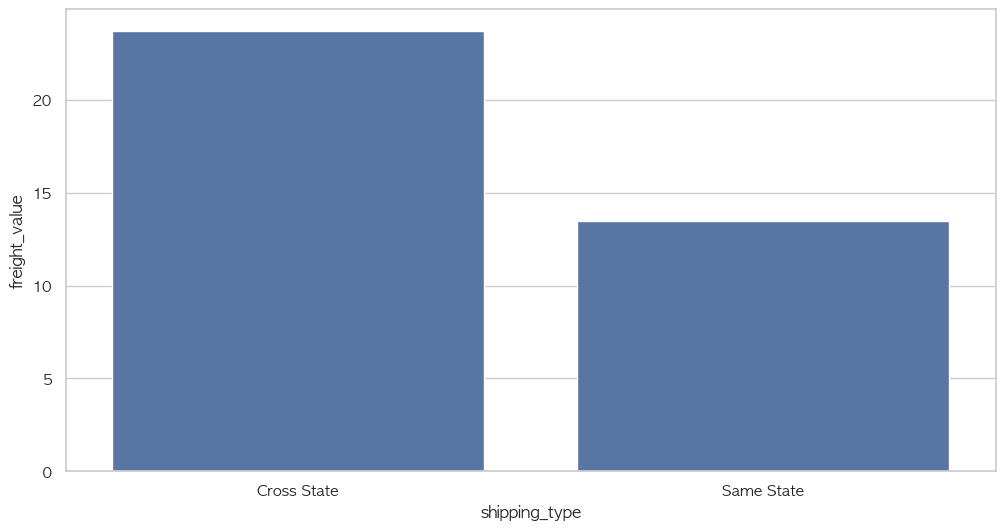

In [369]:
# 판매자와 구매자가 같은 주에 살 경우의 배송비 평균
a1 = freight_df.groupby('shipping_type')['freight_value'].mean()

sns.barplot(a1)
plt.show()

In [370]:
# 판매자 거주지 top 10
seller_state_top10 = freight_df['seller_state'].value_counts().head(10)
display(seller_state_top10)

seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
RS     2199
DF      899
BA      643
GO      520
PE      448
Name: count, dtype: int64

- 바로 위에서 출력한 판매자 거주 지역을 보면 판매자가 상파울로에 집중되어 있다는 것을 확인할 수 있다.
- 따라서 거주지가 SP은 구매자들은 SP에 거주하는 판매자로부터 상품을 받을 확률이 높기 때문에 SP가 다른 지역에 비해 배송비가 낮게 나오는 편이다. 
- 이는 판매자와 구매자의 거주지가 같을 경우 배송비가 낮아진다는 분석와 부합한다.

### 고객 만족도 및 리뷰 분석

1. 분석 개요
- 평점 분석 : 어떤 카테고리의 상품이 고객 불만이 가장 많은가...
- 텍스트 마이닝 : 평점이 낮은 (1~2점)을 준 고객들이 리뷰에 자주 언급하는 단어를 추출하여 불만의 근본 원인을 찾는다

### 평점 분석

In [371]:
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [372]:
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
olist_order_items = pd.read_csv('olist/olist_order_items_dataset.csv')
olist_products = pd.read_csv('olist/olist_products_dataset.csv')
product_category_name_translation = pd.read_csv('olist/product_category_name_translation.csv')

In [373]:
# 병합
a1 = olist_order_reviews[['order_id', 'review_score']]
a2 = olist_order_items[['order_id', 'product_id', 'seller_id']]
df_rating = pd.merge(a1, a2, left_on='order_id', right_on='order_id', how='inner')

a3 = olist_products[['product_id', 'product_category_name']]
df_rating = pd.merge(df_rating, a3, left_on='product_id', right_on='product_id')

df_rating = pd.merge(df_rating, product_category_name_translation, left_on='product_category_name', right_on='product_category_name', how='inner')
df_rating

,order_id,review_score,product_id,seller_id,product_category_name,product_category_name_english
0,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,esporte_lazer,sports_leisure
1,73fc7af87114b39712e6da79b0a377eb,4,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,esporte_lazer,sports_leisure
2,a548910a1c6147796b98fdf73dbeba33,5,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,informatica_acessorios,computers_accessories
3,f9e4b658b201a9f2ecdecbb34bed034b,5,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,informatica_acessorios,computers_accessories
4,658677c97b385a9be170737859d3511b,5,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,ferramentas_jardim,garden_tools
...,...,...,...,...,...,...
110745,2a8c23fee101d4d5662fa670396eb8da,5,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,moveis_decoracao,furniture_decor
110746,22ec9f0669f784db00fa86d035cf8602,5,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,brinquedos,toys
110747,55d4004744368f5571d1f590031933e4,5,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,papelaria,stationery
110748,7725825d039fc1f0ceb7635e3f7d9206,4,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,esporte_lazer,sports_leisure


In [374]:
# 카테고리 별 평균 평점을 집계한다.
cat_stats = df_rating.groupby('product_category_name_english')['review_score'].agg({'mean', 'count'})
# 리뷰의 개수가 50개 이상인 것만 사용한다.
cat_stats = cat_stats.query('count > 50')
cat_stats

,mean,count
product_category_name_english,,
agro_industry_and_commerce,4.000000,212
air_conditioning,3.969178,292
art,3.937198,207
audio,3.825485,361
auto,4.065512,4213
baby,4.011811,3048
bed_bath_table,3.895663,11137
books_general_interest,4.446266,549
books_imported,4.400000,60


In [375]:
# 카테고리 별 평균 평점을 집계한다.
cat_stats = df_rating.groupby('product_category_name_english')['review_score'].agg({'mean', 'count'})
# 리뷰의 개수가 50개 이상인 것만 사용한다.
cat_stats = cat_stats.query('count > 50')
cat_stats = cat_stats.sort_values('mean')
cat_stats

,mean,count
product_category_name_english,,
office_furniture,3.493183,1687
fashion_male_clothing,3.641221,131
fixed_telephony,3.683206,262
audio,3.825485,361
home_confort,3.829885,435
construction_tools_safety,3.844560,193
bed_bath_table,3.895663,11137
furniture_decor,3.903493,8331
furniture_living_room,3.904382,502


In [376]:
# 평점 평균 하위 10개
worst_cats = cat_stats.head(10)
# 평점 평균 상위 10개
best_cats = cat_stats.tail(10)

display(worst_cats)
display(best_cats)

,mean,count
product_category_name_english,,
office_furniture,3.493183,1687
fashion_male_clothing,3.641221,131
fixed_telephony,3.683206,262
audio,3.825485,361
home_confort,3.829885,435
construction_tools_safety,3.844560,193
bed_bath_table,3.895663,11137
furniture_decor,3.903493,8331
furniture_living_room,3.904382,502


,mean,count
product_category_name_english,,
cine_photo,4.205479,73
food,4.218182,495
fashion_shoes,4.233716,261
small_appliances_home_oven_and_coffee,4.302632,76
luggage_accessories,4.315257,1088
food_drink,4.315412,279
books_technical,4.368421,266
books_imported,4.400000,60
costruction_tools_tools,4.444444,99


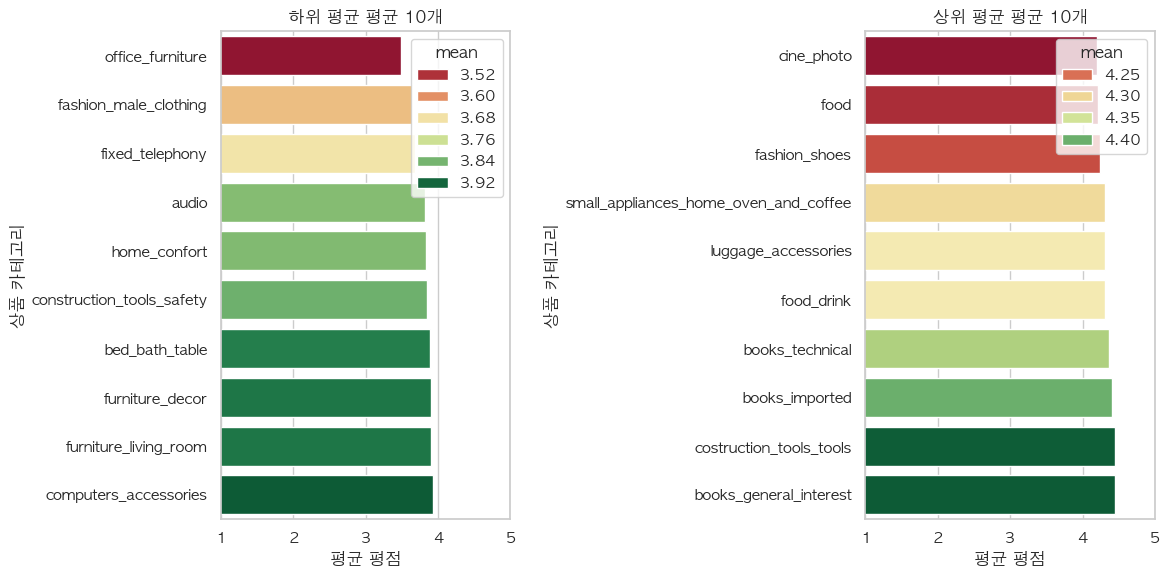

In [377]:
plt.subplot(1, 2, 1)
sns.barplot(x=worst_cats['mean'], y=worst_cats.index, palette='RdYlGn', hue=worst_cats['mean'])
plt.title('하위 평균 평균 10개')
plt.xlabel('평균 평점')
plt.ylabel('상품 카테고리')
plt.xlim(1, 5)

plt.subplot(1, 2, 2)
sns.barplot(x=best_cats['mean'], y=best_cats.index, palette='RdYlGn', hue=best_cats['mean'])
plt.title('상위 평균 평균 10개')
plt.xlabel('평균 평점')
plt.ylabel('상품 카테고리')
plt.xlim(1, 5)

plt.tight_layout()
plt.show()

- Worst 카테고리 : 사무용 가구와 남성 의류 등의 평점이 3점대 중반으로 가장 낮다.
- Best 카테고리 : 여기에 해당하는 상품들 모두 평균 평점이 4점대를 넘는다. 특히 책과 건설공구(?)들은 4.5와 가까운 평점을 보이고 있다.

### 부정 리뷰 키워드 분석
- 판순한 평점 수치를 넘어 고객이 "왜" 화가 나셨는지 텍스트에서 단서를 찾아본다

In [378]:
pt_stopwords = set([
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'uma', 'com', 'não', 'nao', 'para', 'os', 'as', 'no', 'na', 
    'por', 'mais', 'foi', 'mas', 'se', 'eu', 'me', 'isso', 'este', 'esta', 'está', 'tinha', 'muito', 'só', 'pelo',
    'pela', 'quando', 'já', 'ja', 'minha', 'meu', 'ele', 'ela', 'tem', 'ser', 'ter', 'fazer', 'era', 'estava',
    'produto', 'compra', 'loja', 'entregar', 'vendedor', 'prazo', 'comprei', 'entregue', 'recebi', 'veio', 'entrega'
])

In [379]:
import re
from collections import Counter

In [380]:
# 부정적인 리뷰 (평점이 1, 2)를 가져온다.
neg_reviews = olist_order_reviews.query('review_score <= 2')
# 리뷰 냉이 결측치인 것들은 제외한다.
neg_reviews = neg_reviews.dropna(subset=['review_comment_message'])
neg_reviews.isna().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title       8643
review_comment_message        0
review_creation_date          0
review_answer_timestamp       0
dtype: int64

In [381]:
# 모든 단어들을 담을 리스트
all_words = []
# 리뷰 내용에서 특수문자를 제거한다. (알파멧만 남긴다)
for review in neg_reviews['review_comment_message'] :
    # 소문자로 변환, 특수문자 제거
    clean_review = re.sub(r'[^a-zA-Z\u00c0-\u00FF\s]', '', str(review).lower())
    # 만약 한글이라면..
    # clean_review = re.sub(r'[^가-힣\s]', '')
    # 띄어쓰기를 기준으로 잘라낸다.
    words = clean_review.split()

    # 불용어 제외 및 3글자 이상 단어만 선택
    filtered_words = [w for w in words if w not in pt_stopwords and len(w) > 2]
    # 단어를 담는다.
    all_words.extend(filtered_words)

len(all_words)

91447

In [382]:
# 단어의 빈도수를 계산한다.(상위 20개)
word_counts = Counter(all_words).most_common(20)
word_counts

[('ainda', 1385),
 ('até', 1184),
 ('chegou', 1167),
 ('estou', 931),
 ('pedido', 779),
 ('dia', 757),
 ('agora', 684),
 ('como', 672),
 ('apenas', 538),
 ('nem', 514),
 ('nada', 508),
 ('sem', 508),
 ('produtos', 508),
 ('pois', 504),
 ('site', 504),
 ('dois', 500),
 ('quero', 495),
 ('lannister', 480),
 ('mesmo', 467),
 ('contato', 462)]

In [383]:
# 한국어 번역본
translated_data = [
    ('아직', 1385), 
    ('~까지', 1184), 
    ('도착했다', 1167), 
    ('나(상태)', 931), 
    ('주문', 779), 
    ('일(Day)', 757), 
    ('지금', 684), 
    ('어떻게', 672), 
    ('단지', 538), 
    ('~조차(부정)', 514), 
    ('아무것도', 508), 
    ('~없이', 508), 
    ('제품들', 508), 
    ('왜냐하면', 504), 
    ('사이트', 504), 
    ('둘(2)', 500), 
    ('원한다', 495), 
    ('라니스터', 480), 
    ('같은', 467), 
    ('연락', 462)
]

/Users/jeongminpark/miniconda3/envs/data/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


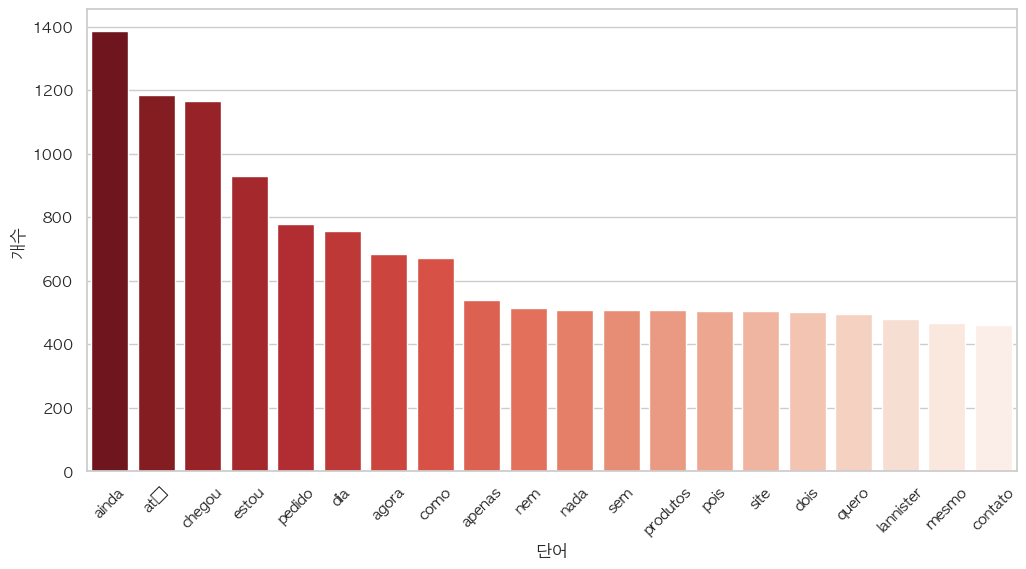

In [384]:
# 시각화
df_keywords = pd.DataFrame(word_counts, columns=['단어', '개수'])

sns.barplot(data=df_keywords, x='단어', y='개수', palette='Reds_r', hue='단어')
plt.xticks(rotation=45)
plt.show()

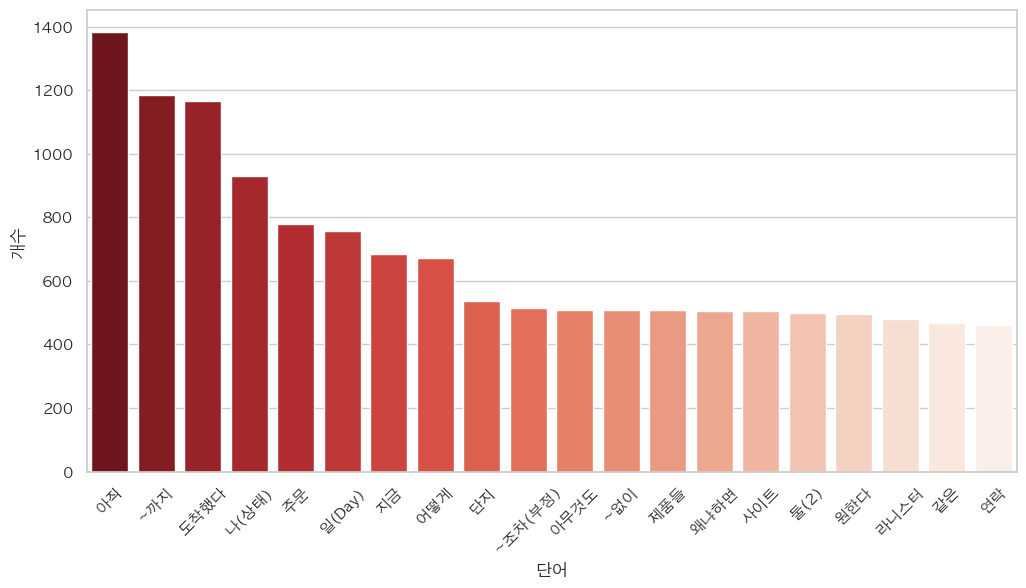

In [385]:
# 시각화
df_keywords_kor = pd.DataFrame(translated_data, columns=['단어', '개수'])

sns.barplot(data=df_keywords_kor, x='단어', y='개수', palette='Reds_r', hue='단어')
plt.xticks(rotation=45)
plt.show()

- 단어들을 품사를 통해 원하는 품사의 단어만 가져다가 사용하고 싶다면 형태소 분석기를 사용하시면 된다.
- 대표적인 konlpy, soynlp 이다.

### 워드 클라우드
- 단어의 빈도수를 단어의 크기로 표현한 그림

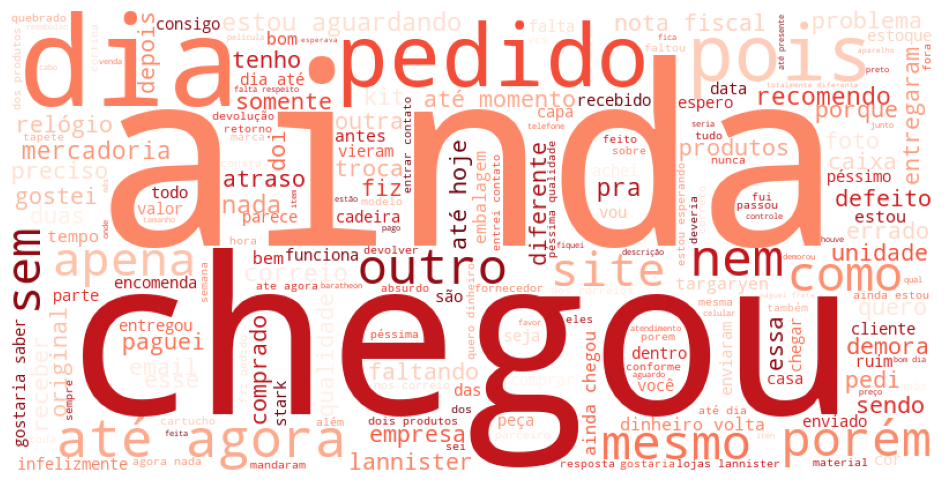

In [386]:
from wordcloud import WordCloud

# 리뷰데이터를 가져온다.
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
# 부정적인 평점만 가져온다.
neg_reviews_text = olist_order_reviews.query('review_score <= 2')
# 결측치를 제거한다.
neg_reviews_text = neg_reviews_text.dropna(subset=['review_comment_message'])

# 포루투갈어 불용어
pt_stopwords = set([
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'uma', 'com', 'não', 'nao', 'para', 'os', 'as', 'no', 'na', 
    'por', 'mais', 'foi', 'mas', 'se', 'eu', 'me', 'isso', 'este', 'esta', 'está', 'tinha', 'muito', 'só', 'pelo',
    'pela', 'quando', 'já', 'ja', 'minha', 'meu', 'ele', 'ela', 'tem', 'ser', 'ter', 'fazer', 'era', 'estava',
    'produto', 'compra', 'loja', 'entregar', 'vendedor', 'prazo', 'comprei', 'entregue', 'recebi', 'veio', 'entrega'
])

# 텍스트 전처리 및 통합
processed_texts = []

# 리뷰 내용에서 특수문자를 제거한다. (알파멧만 남긴다)
for review in neg_reviews['review_comment_message'] :
    # 소문자로 변환, 특수문자 제거
    clean_review = re.sub(r'[^a-zA-Z\u00c0-\u00FF\s]', '', str(review).lower())
    # 만약 한글이라면..
    # clean_review = re.sub(r'[^가-힣\s]', '')
    # 띄어쓰기를 기준으로 잘라낸다.
    words = clean_review.split()

    # 불용어 제외 및 3글자 이상 단어만 선택
    filtered_words = [w for w in words if w not in pt_stopwords and len(w) > 2]
    # 단어를 담는다.
    processed_texts.extend(filtered_words)

# 모든 단어를 띄어쓰기를 기준으로 하나의 문장으로 만들어준다.
full_text = ' '.join(processed_texts)

# 워드 클라우드를 만든다.
# width, height : 이미지의 크기
# background_color : 배경색
# colormap : 글자 색상 테마
word_cloud_generator = WordCloud(width=800, height=400, background_color='white', 
                       stopwords=pt_stopwords, colormap='Reds_r', random_state=42)
word_cloud = word_cloud_generator.generate(full_text)

plt.imshow(word_cloud)
# x, y축 눈금 제거
plt.axis('off')
plt.show()

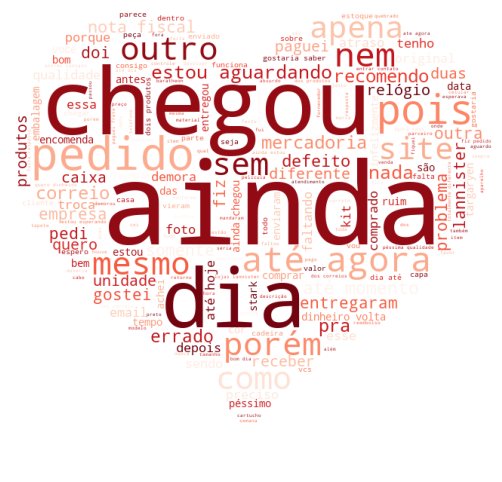

In [387]:
from wordcloud import WordCloud

# 리뷰데이터를 가져온다.
olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
# 부정적인 평점만 가져온다.
neg_reviews_text = olist_order_reviews.query('review_score <= 2')
# 결측치를 제거한다.
neg_reviews_text = neg_reviews_text.dropna(subset=['review_comment_message'])

# 포루투갈어 불용어
pt_stopwords = set([
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'uma', 'com', 'não', 'nao', 'para', 'os', 'as', 'no', 'na', 
    'por', 'mais', 'foi', 'mas', 'se', 'eu', 'me', 'isso', 'este', 'esta', 'está', 'tinha', 'muito', 'só', 'pelo',
    'pela', 'quando', 'já', 'ja', 'minha', 'meu', 'ele', 'ela', 'tem', 'ser', 'ter', 'fazer', 'era', 'estava',
    'produto', 'compra', 'loja', 'entregar', 'vendedor', 'prazo', 'comprei', 'entregue', 'recebi', 'veio', 'entrega'
])

# 텍스트 전처리 및 통합
processed_texts = []

# 리뷰 내용에서 특수문자를 제거한다. (알파멧만 남긴다)
for review in neg_reviews['review_comment_message'] :
    # 소문자로 변환, 특수문자 제거
    clean_review = re.sub(r'[^a-zA-Z\u00c0-\u00FF\s]', '', str(review).lower())
    # 만약 한글이라면..
    # clean_review = re.sub(r'[^가-힣\s]', '')
    # 띄어쓰기를 기준으로 잘라낸다.
    words = clean_review.split()

    # 불용어 제외 및 3글자 이상 단어만 선택
    filtered_words = [w for w in words if w not in pt_stopwords and len(w) > 2]
    # 단어를 담는다.
    processed_texts.extend(filtered_words)

# 모든 단어를 띄어쓰기를 기준으로 하나의 문장으로 만들어준다.
full_text = ' '.join(processed_texts)


# 워드 클라우드 모양을 위한 mask 생성
from PIL import Image
img = Image.open('aa.png')
mark_array = np.array(img)

# 워드 클라우드를 만든다.
# width, height : 이미지의 크기
# background_color : 배경색
# colormap : 글자 색상 테마
# 만약을 한글을 쓰고 싶다면 font_path 에 한글 폰트 경로를 넣어주세요
# 워드 클라우드의 모양을 정해주고 싶다면 mask에 이미지 데이터를  ndarray로 만든 행렬을 넣어주세요
word_cloud_generator = WordCloud(width=800, height=400, background_color='white', mask=mark_array,
                       stopwords=pt_stopwords, colormap='Reds_r', random_state=42)
word_cloud = word_cloud_generator.generate(full_text)

plt.imshow(word_cloud)
# x, y축 눈금 제거
plt.axis('off')
plt.show()

---
---

### 실습 문제

### 문제1) 2017년 매출 Top5 카테고리를 추출
- 카테고리명은 영문으로..

### 문제2) 결제 수단별 사용 비율

### 문제3) 배송 미완료 주문 비율 계산

### 문제4) 월별 MAU와 매출에 관한 시각화
- MAU (Monthly Active Users) : 한 달 동안 구매 이력이 있는 고유 고객 수
- 매출은 월별 총 판매 금액(GMV)으로 한다.

### 문제5) 주(state)별 배송 지연율 분석

### 문제6) 리뷰 점수와 배송 시간의 상관관계

--

아래 두 개는 파이널 프로젝트 끝나고 머신러닝을 매운 후에 같이 해보겠습니다.

### 문제7) 이탈 예측

### 문제8) 배송일 예측

In [388]:
# 문제4) 월별 MAU와 매출에 관한 시각화
# - MAU (Monthly Active Users) : 한 달 동안 구매 이력이 있는 고유 고객 수
# - 매출은 월별 총 판매 금액(GMV)으로 한다.

In [389]:
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
olist_order_payments = pd.read_csv('olist/olist_order_payments_dataset.csv')

In [390]:
# 날짜 형식 변환
olist_orders['order_purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [391]:
olist_orders['month'] = olist_orders['order_purchase_timestamp'].dt.to_period('M')
olist_orders['month'].value_counts()

month
2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
2017-10    4631
2017-08    4331
2017-09    4285
2017-07    4026
2017-05    3700
2017-06    3245
2017-03    2682
2017-04    2404
2017-02    1780
2017-01     800
2016-10     324
2018-09      16
2016-09       4
2018-10       4
2016-12       1
Freq: M, Name: count, dtype: int64

In [392]:
olist_data_4 = pd.merge(olist_orders,olist_order_payments,on='order_id',how='inner')
olist_data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_approved_at              103711 non-null  object        
 5   order_delivered_carrier_date   101998 non-null  object        
 6   order_delivered_customer_date  100754 non-null  object        
 7   order_estimated_delivery_date  103886 non-null  object        
 8   month                          103886 non-null  period[M]     
 9   payment_sequential             103886 non-null  int64         
 10  payment_type                   103886 non-null  object        
 11  

In [393]:
monthly_trend_4 = olist_data_4.groupby('month').agg({
    'customer_id' : 'nunique',
    'payment_value' : 'sum'
})

In [394]:
monthly_trend_4 = monthly_trend_4.rename(
    columns={
        'customer_id': 'mau',
        'payment_value': 'gmv'
    }
)
monthly_trend_4 = monthly_trend_4.reset_index()
monthly_trend_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   month   25 non-null     period[M]
 1   mau     25 non-null     int64    
 2   gmv     25 non-null     float64  
dtypes: float64(1), int64(1), period[M](1)
memory usage: 732.0 bytes


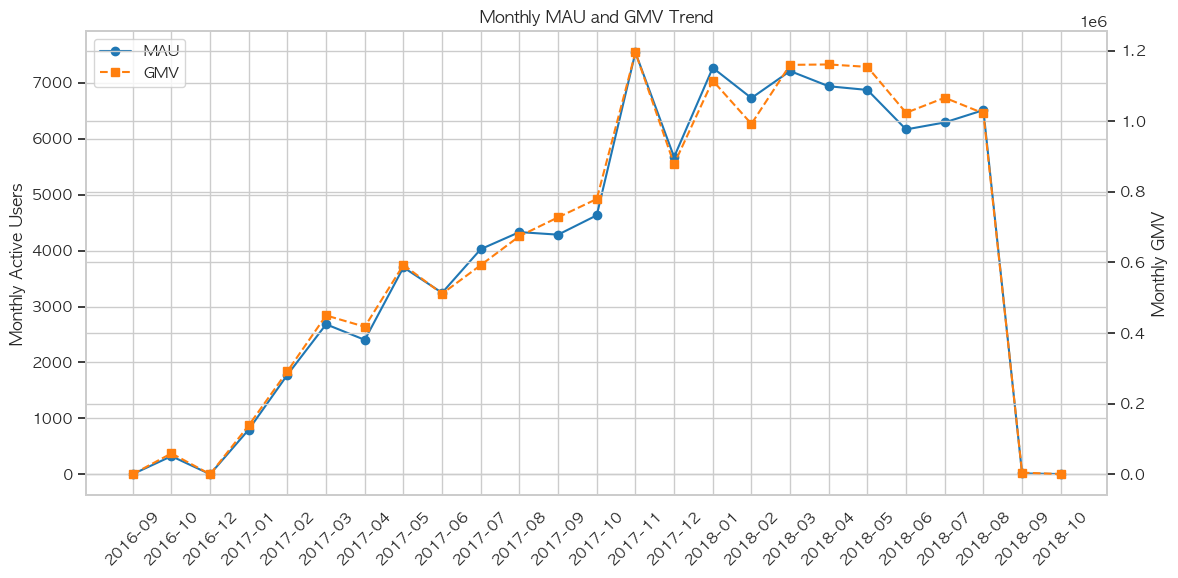

In [395]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# MAU (왼쪽 축)
line1, = ax1.plot(
    monthly_trend_4['month'].astype(str),
    monthly_trend_4['mau'],
    marker='o',
    color='tab:blue',
    label='MAU'
)

ax1.set_ylabel('Monthly Active Users')
ax1.tick_params(axis='x', rotation=45)

# GMV (오른쪽 축)
ax2 = ax1.twinx()
line2, = ax2.plot(
    monthly_trend_4['month'].astype(str),
    monthly_trend_4['gmv'],
    marker='s',
    linestyle='--',
    color='tab:orange',
    label='GMV'
)

ax2.set_ylabel('Monthly GMV')

# ✅ 범례 정확히 결합
ax1.legend([line1, line2], ['MAU', 'GMV'], loc='upper left')

plt.title('Monthly MAU and GMV Trend')
plt.tight_layout()
plt.show()


---

In [396]:
# 문제5) 주(state)별 배송 지연율 분석

olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
    # order_delivered_customer_date : 실제 고객 배송 시각 - 쓸거
    # order_estimated_delivery_date : 구매시 제공된 예상 배송 날짜 - 쓸거
    # customer_id : 주문한 고객 ID - 결합
olist_customers = pd.read_csv('olist/olist_customers_dataset.csv')
    # customer_state : 고객 거주 주 - 쓸거
    # customer_id : 주문한 고객 ID - 결합

In [397]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [398]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [399]:
delay_state_5 = pd.merge(olist_orders,olist_customers,on='customer_id',how='inner')
delay_state_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [400]:
delay_state_5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [401]:
# 날짜 형식 변환
delay_state_5['order_delivered_customer_date'] = pd.to_datetime(delay_state_5['order_delivered_customer_date'])
delay_state_5['order_estimated_delivery_date'] = pd.to_datetime(delay_state_5['order_estimated_delivery_date'])
delay_state_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [402]:
delay_state_5['delay_date']=delay_state_5['order_delivered_customer_date'] - delay_state_5['order_estimated_delivery_date'] 
delay_state_5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delay_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-10 days +18:17:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,-11 days +15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-2 days +17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-6 days +11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-21 days +23:32:54


In [403]:
delay_state_5=delay_state_5.groupby('customer_state').agg({
    'delay_date' : 'mean',
})
delay_state_5=delay_state_5.reset_index()
delay_state_5

,customer_state,delay_date
0,AC,-21 days +22:09:06.600000
1,AL,-9 days +23:13:50.113350126
2,AM,-19 days +03:33:23.013793104
3,AP,-20 days +22:34:25.880597015
4,BA,-11 days +21:37:20.127457003
5,CE,-11 days +21:21:35.416731822
6,DF,-12 days +15:51:05.066346154
7,ES,-10 days +04:52:09.791478697
8,GO,-12 days +12:23:38.987225345
9,MA,-9 days +02:41:30.237099024


In [404]:
delay_state_vis = delay_state_5.copy()
delay_state_vis['delay_days'] = delay_state_vis['delay_date'].dt.total_seconds() / 86400

In [405]:
delay_state_vis = delay_state_vis.sort_values('delay_days')
delay_state_vis

,customer_state,delay_date,delay_days
0,AC,-21 days +22:09:06.600000,-20.077007
20,RO,-20 days +14:28:34.197530865,-19.396826
3,AP,-20 days +22:34:25.880597015,-19.059423
2,AM,-19 days +03:33:23.013793104,-18.851817
21,RR,-17 days +09:43:46.756097561,-16.594598
12,MT,-14 days +07:32:48.502257337,-13.685550
13,PA,-14 days +14:43:44.675475687,-13.386288
22,RS,-14 days +18:59:46.572230539,-13.208489
19,RN,-13 days +00:54:13.040084389,-12.962349
17,PR,-13 days +09:07:39.810887670,-12.619678


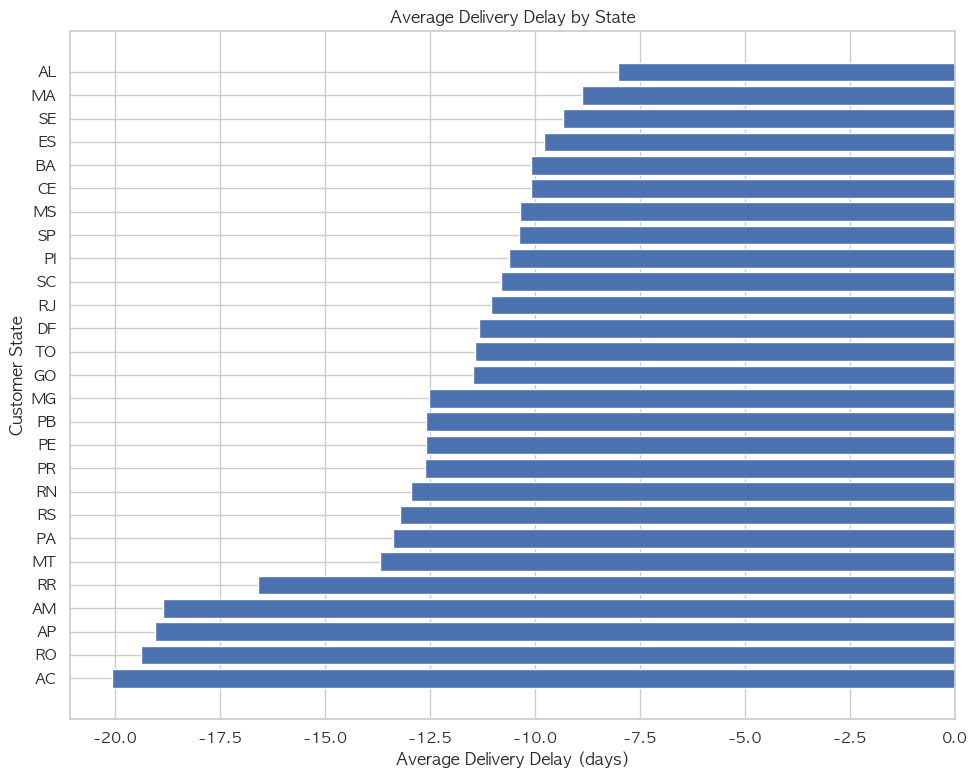

In [406]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.barh(
    delay_state_vis['customer_state'],
    delay_state_vis['delay_days']
)

plt.xlabel('Average Delivery Delay (days)')
plt.ylabel('Customer State')
plt.title('Average Delivery Delay by State')


plt.tight_layout()
plt.show()

---

In [407]:
# 문제6) 리뷰 점수와 배송 시간의 상관관계

olist_order_reviews = pd.read_csv('olist/olist_order_reviews_dataset.csv')
    # review_score : 리뷰 점수 (1-5점) - 쓸거
    # order_id : 주문 고유 식별자 - 결합
olist_orders = pd.read_csv('olist/olist_orders_dataset.csv')
    # order_delivered_carrier_date : 주문이 배송사에게 전달된 시각
    # order_delivered_customer_date : 실제 고객 배송 시각
    # order_id : 주문 고유 식별자 - 결합


In [408]:
review_delay_6 = pd.merge(olist_order_reviews,olist_orders,on='order_id',how='inner')
review_delay_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   review_id                      99224 non-null  object
 1   order_id                       99224 non-null  object
 2   review_score                   99224 non-null  int64 
 3   review_comment_title           11568 non-null  object
 4   review_comment_message         40977 non-null  object
 5   review_creation_date           99224 non-null  object
 6   review_answer_timestamp        99224 non-null  object
 7   customer_id                    99224 non-null  object
 8   order_status                   99224 non-null  object
 9   order_purchase_timestamp       99224 non-null  object
 10  order_approved_at              99068 non-null  object
 11  order_delivered_carrier_date   97468 non-null  object
 12  order_delivered_customer_date  96359 non-null  object
 13  o

In [409]:
# 날짜 형식 변환
review_delay_6['order_delivered_customer_date'] = pd.to_datetime(review_delay_6['order_delivered_customer_date'])
review_delay_6['order_estimated_delivery_date'] = pd.to_datetime(review_delay_6['order_estimated_delivery_date'])
review_delay_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      99224 non-null  object        
 1   order_id                       99224 non-null  object        
 2   review_score                   99224 non-null  int64         
 3   review_comment_title           11568 non-null  object        
 4   review_comment_message         40977 non-null  object        
 5   review_creation_date           99224 non-null  object        
 6   review_answer_timestamp        99224 non-null  object        
 7   customer_id                    99224 non-null  object        
 8   order_status                   99224 non-null  object        
 9   order_purchase_timestamp       99224 non-null  object        
 10  order_approved_at              99068 non-null  object        
 11  order_delivered

In [410]:
review_delay_6['delay_date']=review_delay_6['order_delivered_customer_date']-review_delay_6['order_estimated_delivery_date']
review_delay_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   review_id                      99224 non-null  object         
 1   order_id                       99224 non-null  object         
 2   review_score                   99224 non-null  int64          
 3   review_comment_title           11568 non-null  object         
 4   review_comment_message         40977 non-null  object         
 5   review_creation_date           99224 non-null  object         
 6   review_answer_timestamp        99224 non-null  object         
 7   customer_id                    99224 non-null  object         
 8   order_status                   99224 non-null  object         
 9   order_purchase_timestamp       99224 non-null  object         
 10  order_approved_at              99068 non-null  object         
 11  or

In [411]:
review_delay_6['delay_days'] = review_delay_6['delay_date'].dt.total_seconds() / 86400
review_delay_6

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_date,delay_days
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16 days +18:42:41,-15.220359
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,-5 days +23:17:20,-4.029630
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,-21 days +17:28:48,-20.271667
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,-20 days +09:08:35,-19.619039
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,-9 days +16:33:35,-8.310012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,-14 days +13:22:37,-13.442627
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,-12 days +17:19:00,-11.278472
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,-16 days +17:44:08,-15.261019
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,-16 days +12:57:51,-15.459826


In [412]:
review_delay_6 = review_delay_6.sort_values('delay_days')

In [413]:
review_delay_6 = review_delay_6[
    review_delay_6['review_score'].notna() &
    review_delay_6['delay_days'].notna()
]

In [414]:
from scipy.stats import pearsonr

r, p = pearsonr(
    review_delay_6['delay_days'],
    review_delay_6['review_score']
)

r, p


(np.float64(-0.2664140261727476), np.float64(0.0))

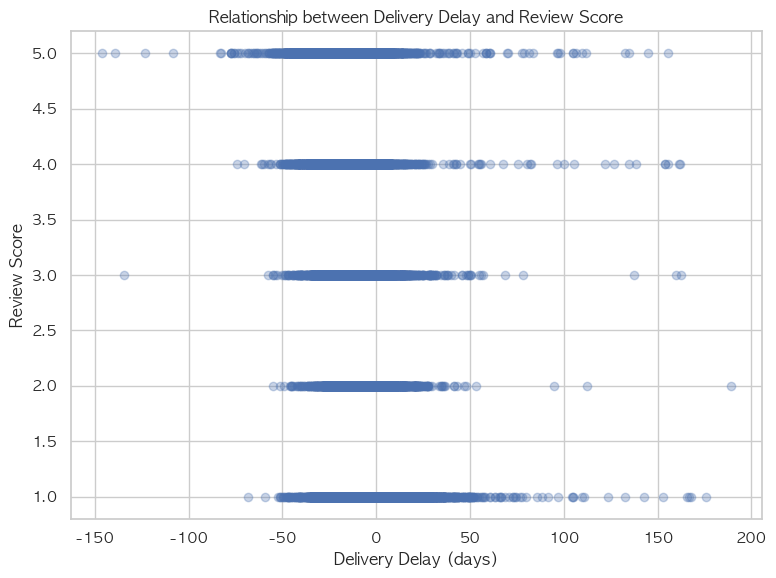

In [415]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    review_delay_6['delay_days'],
    review_delay_6['review_score'],
    alpha=0.3
)

plt.xlabel('Delivery Delay (days)')
plt.ylabel('Review Score')
plt.title('Relationship between Delivery Delay and Review Score')

plt.tight_layout()
plt.show()


In [416]:
review_delay_group = (
    review_delay_6
    .groupby('review_score')
    .agg(avg_delay=('delay_days', 'mean'))
    .reset_index()
)

review_delay_group


,review_score,avg_delay
0,1,-3.370628
1,2,-7.938027
2,3,-10.078493
3,4,-11.684076
4,5,-12.688362
